## Group 6 - Math for AI, AI23 @ HCMUS
- 23122013 - Đinh Đức Tài
- 23122002 - Nguyễn Đình Hà Dương
- 23122004 - Nguyễn Lê Hoàng Trung
- 23122014 - Hoàng Minh Trung

## [Lab1] Linear Regression

## Part 0: Import libs, define DataProcessor and functions

#### 0.1: Import libs: Numpy, Pandas, Matplotlib

In [1]:
# Importing the libraries: numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

#### 0.2: Create class DataProcessor

In [2]:
class DataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.original = True

    def load_data(self):
        """Load data from the CSV file."""
        self.data = pd.read_csv(self.file_path)
        print("Data loaded successfully!")
        return self.data
    
    def get_summary(self):
        """Print a summary of the data."""
        print("Number of rows:", len(self.data))
        print("Column names:", self.data.columns.tolist())
        return self.data.describe()
    
    def head(self, n = 5):
        """Return the first n rows of the data."""
        return self.data.head(n)
    
    def null_info(self):
        """Print information about missing values."""
        print("\nNumber of rows with NaN values:", self.data.isna().any(axis=1).sum())

    def get_column_initial_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
                "Dung tích bình nhiên liệu (lít)"
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info
    
    def get_column_after_transform_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
                "Dung tích bình nhiên liệu (lít)", 'Vòng tua tại Công suất tối đa (rpm)',
                'Vòng tua tại Mô-men xoắn tối đa (rpm)',
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

#### 0.3: Get infomation about unique values functions

In [3]:
def get_some_unique_values(self):
    print("\nUnique values of some columns:")
    print("Fuel Type:", self.data['Fuel Type'].unique())
    print("Transmission:", self.data['Transmission'].unique())
    print("Seller Type:", self.data['Seller Type'].unique())
    print("Drivetrain:", self.data['Drivetrain'].unique())

    print("Owner:", self.data['Owner'].unique())
    print("Seating Capacity:", self.data['Seating Capacity'].unique())

def unique_values(self):
    object_columns = self.data.select_dtypes(include=['object']).columns
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns

    # List of object columns and their unique values
    object_columns_list = [(col, self.data[col].nunique()) for col in object_columns]

    # List of numeric columns and their unique values
    numeric_columns_list = [(col, self.data[col].nunique()) for col in numeric_columns]

    print("Object Columns and number of unique values: {}".format(len(object_columns_list)))
    print(object_columns_list)

    print("\nNumeric Columns and number of unique values: {}".format(len(numeric_columns_list)))
    print(numeric_columns_list)
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns
    return numeric_columns, object_columns

DataProcessor.get_some_unique_values = get_some_unique_values
DataProcessor.unique_values = unique_values

#### 0.4: Clean and transform data functions

In [4]:
def clean_data(self):
    """Clean the data by handling missing values and duplicates."""
    # Handle missing values
    # Fill numeric columns with their mean
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean().astype(int))

    # Fill categorical columns with the most frequent value
    categorical_columns = self.data.select_dtypes(include=['object']).columns
    self.data[categorical_columns] = self.data[categorical_columns].fillna(self.data[categorical_columns].mode().iloc[0])

    # Remove duplicates
    self.data = self.data.drop_duplicates()

    # Reset index after cleaning
    self.data.reset_index(drop=True, inplace=True)

    # Print summary after cleaning
    print("Data cleaned successfully!")
    print("Number of rows after cleaning:", len(self.data))
    print("Number of missing values after cleaning:", self.data.isna().sum().sum())

def transform_data(self):
    """Transform data by standardizing specific columns."""
    # 'Engine' ('cc') -> float
    self.data['Engine'] = self.data['Engine'].astype(str).str.replace(' cc', '').astype(float)

    # Extract RPM values from the original string values before conversion
    if (self.original is True):
        self.data['rpm at Max Power'] = (
            self.data['Max Power']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
        self.data['rpm at Max Torque'] = (
            self.data['Max Torque']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
    self.original = False

    # Fill missing values with the most frequent value
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].fillna(self.data['rpm at Max Power'].mode().iloc[0])
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].fillna(self.data['rpm at Max Torque'].mode().iloc[0])

    # 'rpm at Max Power' -> int
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].astype(int)

    # 'rpm at Max Torque' -> int
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].astype(int)
    
    # 'Max Power' ('bhp') -> int
    self.data['Max Power'] = self.data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Max Torque' ('Nm') -> int
    self.data['Max Torque'] = self.data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Seating Capacity' -> int
    self.data['Seating Capacity'] = self.data['Seating Capacity'].astype(int)

    # 'Fuel Tank Capacity' -> int
    self.data['Fuel Tank Capacity'] = self.data['Fuel Tank Capacity'].astype(int)

    # 'Owner' -> int
    self.data['Owner'] = self.data['Owner'].map({
        'UnRegistered Car': 0,
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth': 4,
        '4 or More': 5,
        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
    })

    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

    print("Data transformed successfully!")
    print("\nData Transformation Details:")
    print("- 'Engine' (cc) converted to float.")
    print("- 'Max Power' (bhp) converted to integer.")
    print("- 'Max Torque' (Nm) converted to integer.")
    print("- Add 'rpm at Max Power' and converted to integer.")
    print("- Add 'rpm at Max Torque' and converted to integer.")
    print("- 'Seating Capacity' converted to integer.")
    print("- 'Fuel Tank Capacity' converted to integer.")
    print("- 'Owner' converted to numerical categories.")

DataProcessor.clean_data = clean_data
DataProcessor.transform_data = transform_data

#### 0.5: Data visualization functions

In [5]:
def plot_corr_matrix(self, width=12, height=8):
    # Compute the correlation matrix using only numeric features
    corr_matrix = self.data[self.numeric_columns].corr()

    # Plot the correlation matrix using matplotlib
    plt.figure(figsize=(width, height))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Correlation Matrix of Numeric Features")

    # Annotate the matrix with correlation coefficients
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_distribution_of_numeric_columns(self):
    # Plot histograms for all numeric columns
    num_cols = self.numeric_columns

    num_cols_count = len(num_cols)
    n_cols = 3  # Number of columns in the figure
    n_rows = (num_cols_count + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3.5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(num_cols):
        axes[i].hist(self.data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def box_plot_for_object_columns(self):
    for col in self.object_columns:
        if (col == 'Model'): 
            continue
        plt.figure(figsize=(12, 3))
        categories = self.data[col].unique()
        groups = [self.data.loc[self.data[col] == category, 'Price'] for category in categories]
        plt.boxplot(groups, patch_artist=True, tick_labels=categories)
        plt.title(f'Box Plot: Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        if (col == 'Location'):
            plt.xticks(rotation=90)
        elif (col == 'Fuel Type' or col == 'Transmission' or col == 'Seller Type' or col == 'Drivetrain'):
            plt.xticks(rotation=0)
        else:
            plt.xticks(rotation=60)
        plt.show()

def scatter_plot_for_numeric_columns(self):
    cols = [col for col in self.numeric_columns if col != 'Price']
    n_plots = len(cols)
    n_cols = 3
    n_rows = int(n_plots / n_cols) + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        axes[i].scatter(self.data[col], self.data['Price'], alpha=0.5, color='blue', edgecolors='k')
        axes[i].set_title(f'Relationship between Price and {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

DataProcessor.plot_corr_matrix = plot_corr_matrix
DataProcessor.plot_distribution_of_numeric_columns = plot_distribution_of_numeric_columns
DataProcessor.box_plot_for_object_columns = box_plot_for_object_columns
DataProcessor.scatter_plot_for_numeric_columns = scatter_plot_for_numeric_columns

#### 0.6: Split dataset to train set and validation set

In [6]:
def train_valid_split(self, valid_size=0.2, random_state=None):
    """Split the data into training and validation sets, ensuring all unique 'Model' values are present in the training set."""
    train_set = copy.deepcopy(self)
    valid_set = copy.deepcopy(self)
    
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Identify unique models
    unique_models = self.data['Model'].unique()
    
    # Create training indices: start with an empty list
    train_indices = []
    
    # Iterate through each unique model
    for model in unique_models:
        # Get indices where the 'Model' column equals the current unique model
        model_indices = self.data[self.data['Model'] == model].index.tolist()
        
        # Randomly choose one index for each model to be included in the training set
        # This ensures that at least one sample of each model is in the training set
        chosen_index = np.random.choice(model_indices)
        train_indices.append(chosen_index)

    # Create remaining indices for the training set
    remaining_count = int((1 - valid_size) * len(self.data)) - len(train_indices)
    remaining_indices = list(set(np.arange(len(self.data))) - set(train_indices))
    
    # Randomly sample from the remaining indices to complete the training set
    sampled_indices = np.random.choice(remaining_indices, size=remaining_count, replace=False).tolist()
    train_indices.extend(sampled_indices)
    
    # Create validation indices: the indices not in the training set
    valid_indices = list(set(np.arange(len(self.data))) - set(train_indices))
    
    # Shuffle the training indices
    np.random.shuffle(train_indices)

    # Assign data to train_set and valid_set
    train_set.data = self.data.iloc[train_indices].reset_index(drop=True)
    valid_set.data = self.data.iloc[valid_indices].reset_index(drop=True)

    return train_set, valid_set

DataProcessor.train_valid_split = train_valid_split

#### 0.7: Data Encoding

In [7]:
def encode_data(self):
    """
    Mã hóa các biến theo yêu cầu:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make
    make_median = self.data.groupby('Make')['Price'].median()
    self.data['Make'] = self.data['Make'].map(make_median)
    
    # Mẫu xe: map giá trung vị theo Model
    model_median = self.data.groupby('Model')['Price'].median()
    self.data['Model'] = self.data['Model'].map(model_median)
    
    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)
    
    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)
    
    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = self.data['Price'].median()
    location_medians = self.data.groupby('Location')['Price'].median()
    def encode_location(loc):
        return 1 if location_medians.loc[loc] >= global_median_price else 0
    self.data['Location'] = self.data['Location'].apply(encode_location)
    
    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)
    
    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)
    
    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = {'FWD': 1, 'RWD': 2, 'AWD': 3}
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)
    
    print("Data encoding completed!")
    encoding_information = {}
    encoding_information['make_median'] = make_median
    encoding_information['model_median'] = model_median
    encoding_information['location_medians'] = location_medians
    encoding_information['global_median_price'] = global_median_price
    encoding_information['drivetrain_mapping'] = drivetrain_mapping
    return encoding_information
    
# Gắn hàm encode_data vào class DataProcessor
DataProcessor.encode_data = encode_data

def encode_data_test_set(self, encoding_information):
    """
    Mã hóa dữ liệu kiểm tra theo thông tin đã học từ tập huấn luyện:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make, use global_median_price for missing keys
    self.data['Make'] = self.data['Make'].apply(
        lambda x: encoding_information['make_median'].get(x, encoding_information['global_median_price'])
    )
    
    # Mẫu xe: map giá trung vị theo Model, use global_median_price for missing keys
    self.data['Model'] = self.data['Model'].apply(
        lambda x: encoding_information['model_median'].get(x, encoding_information['global_median_price'])
    )
    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)
    
    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)
    
    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = encoding_information['global_median_price']
    location_medians = encoding_information['location_medians']
    def encode_location(loc):
        try:
            return 1 if location_medians.loc[loc] >= global_median_price else 0
        except KeyError:
            return 0
    self.data['Location'] = self.data['Location'].apply(encode_location)

    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)

    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)

    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = encoding_information['drivetrain_mapping']
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)

    print("Data encoding completed!")

# Gắn hàm encode_data_test_set vào class DataProcessor
DataProcessor.encode_data_test_set = encode_data_test_set

#### 0.8: Data Normalization

In [8]:
def normalize_data(self):
    """
    Chuẩn hóa các feature dữ liệu:
    - Áp dụng log transformation cho 'Price' và 'Kilometer' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """

    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Kilometer'] = np.log1p(self.data['Kilometer'])
    
    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price'])
    
    min_vals = self.data[numeric_cols].min()
    max_vals = self.data[numeric_cols].max()
    range_vals = max_vals - min_vals
    # Avoid division by zero by replacing 0 differences with 1
    range_vals[range_vals == 0] = 1
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals
    
    self.unique_values()
    print("Data normalization completed!")

    return range_vals, min_vals, max_vals
    
DataProcessor.normalize_data = normalize_data

def normalize_data_test_set(self, range_vals, min_vals):
    """
    Chuẩn hóa dữ liệu kiểm tra theo thông tin đã học từ tập huấn luyện:
    - Áp dụng log transformation cho 'Price' và 'Kilometer' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """
    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Kilometer'] = np.log1p(self.data['Kilometer'])
    
    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price'])
    
    # Normalize the test set
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals

    self.unique_values()
    print("Data normalization completed!")

DataProcessor.normalize_data_test_set = normalize_data_test_set

## Part I: Load and Explore data (train.csv)

In this part, we will load and explore some information about the original data.

In [9]:
# Initialize the DataProcessor class and load the data (train.csv)
file_path = './data/train.csv'
data = DataProcessor(file_path)
data.load_data()

# Print summary of the data
print("\nSummary of the data:")
data.get_summary()

# First 5 rows of data
print("\nFirst 5 rows of data:")
data.head()

Data loaded successfully!

Summary of the data:
Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [10]:
# Print information about the null values
data.null_info()

# Print information about the columns
data.get_column_initial_info()


Number of rows with NaN values: 149

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,object,0,6,First


In [11]:
# Print the unique values of some columns
data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: [nan 'RWD' 'FWD' 'AWD']
Owner: ['Second' 'First' 'Third' 'UnRegistered Car' '4 or More' 'Fourth']
Seating Capacity: [nan  5.  7.  2.  6.  8.  4.]


## Part II: Data Preprocessing

In this part, we split data into a training set and a validation set, fill NaN values, and perform some data transformation.

#### II.0: Split dataset

In [12]:
train_data, valid_data = data.train_valid_split(valid_size=0.1, random_state=0)

#### II.1: Data cleaning

In [13]:
# Clean the data and fill missing values
train_data.clean_data()
valid_data.clean_data()

Data cleaned successfully!
Number of rows after cleaning: 1482
Number of missing values after cleaning: 0
Data cleaned successfully!
Number of rows after cleaning: 165
Number of missing values after cleaning: 0


#### II.2: Data Transformation

In [14]:
# Transform the data
train_data.transform_data()
valid_data.transform_data()

Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.
Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.


#### II.3: Explore train data after preprocessing

In [15]:
train_data.get_column_after_transform_info()


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,Fortuner 2.8 4x2 AT [2016-2020]
2,Price,Giá xe (VNĐ),int64,0,534,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,649,65000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,73,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1


In [16]:
valid_data.get_column_after_transform_info()


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,21,Maruti Suzuki
1,Model,Mẫu xe,object,0,133,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,137,400000
3,Year,Năm sản xuất,int64,0,15,2018.0
4,Kilometer,Số km đã đi,int64,0,125,42000
5,Fuel Type,Loại nhiên liệu,object,0,3,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,41,Delhi
8,Color,Màu xe,object,0,13,White
9,Owner,Số chủ sở hữu trước đó,int64,0,4,1.0


In [17]:
# Find models in validation set that are not in train set
train_models = train_data.data['Model'].unique()
validation_models = valid_data.data['Model'].unique()

new_models = [model for model in validation_models if model not in train_models]

print("Models in validation set but not in train set:", new_models)

Models in validation set but not in train set: []


In [18]:
train_data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'Electric' 'LPG' 'Hybrid' 'Petrol + LPG'
 'CNG + CNG']
Transmission: ['Manual' 'Automatic']
Seller Type: ['Individual' 'Commercial Registration' 'Corporate']
Drivetrain: ['RWD' 'FWD' 'AWD']
Owner: [1 2 0 3 4 5]
Seating Capacity: [8 7 5 6 4 2]


In [19]:
# Print number of unique values for each column
numeric_columns, object_columns = train_data.unique_values()
print()
numeric_columns, object_columns = valid_data.unique_values()

# Create save point: after preprocessing
train_data_after_preprocessing = copy.deepcopy(train_data)
validation_data_after_preprocessing = copy.deepcopy(valid_data)

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 912), ('Fuel Type', 8), ('Transmission', 2), ('Location', 73), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 534), ('Year', 21), ('Kilometer', 649), ('Owner', 6), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]

Object Columns and number of unique values: 8
[('Make', 21), ('Model', 133), ('Fuel Type', 3), ('Transmission', 2), ('Location', 41), ('Color', 13), ('Seller Type', 2), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 137), ('Year', 15), ('Kilometer', 125), ('Owner', 4), ('Engine', 44), ('Max Power', 60), ('Max Torque', 56), ('Length', 73), ('Width', 68), ('Height', 69), ('Seating Capacity', 5), ('Fuel Tank Capacity', 34), ('rpm at Max Power', 22), 

## Part III: Data visualization

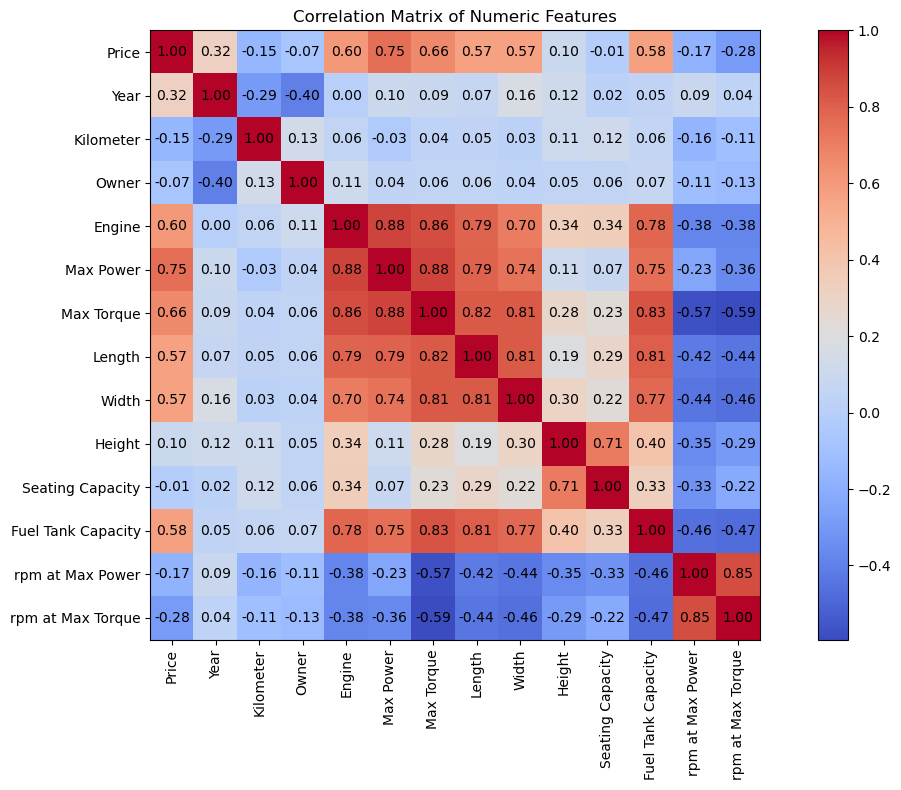

In [20]:
# 1. Plot the correlation matrix
train_data.plot_corr_matrix()

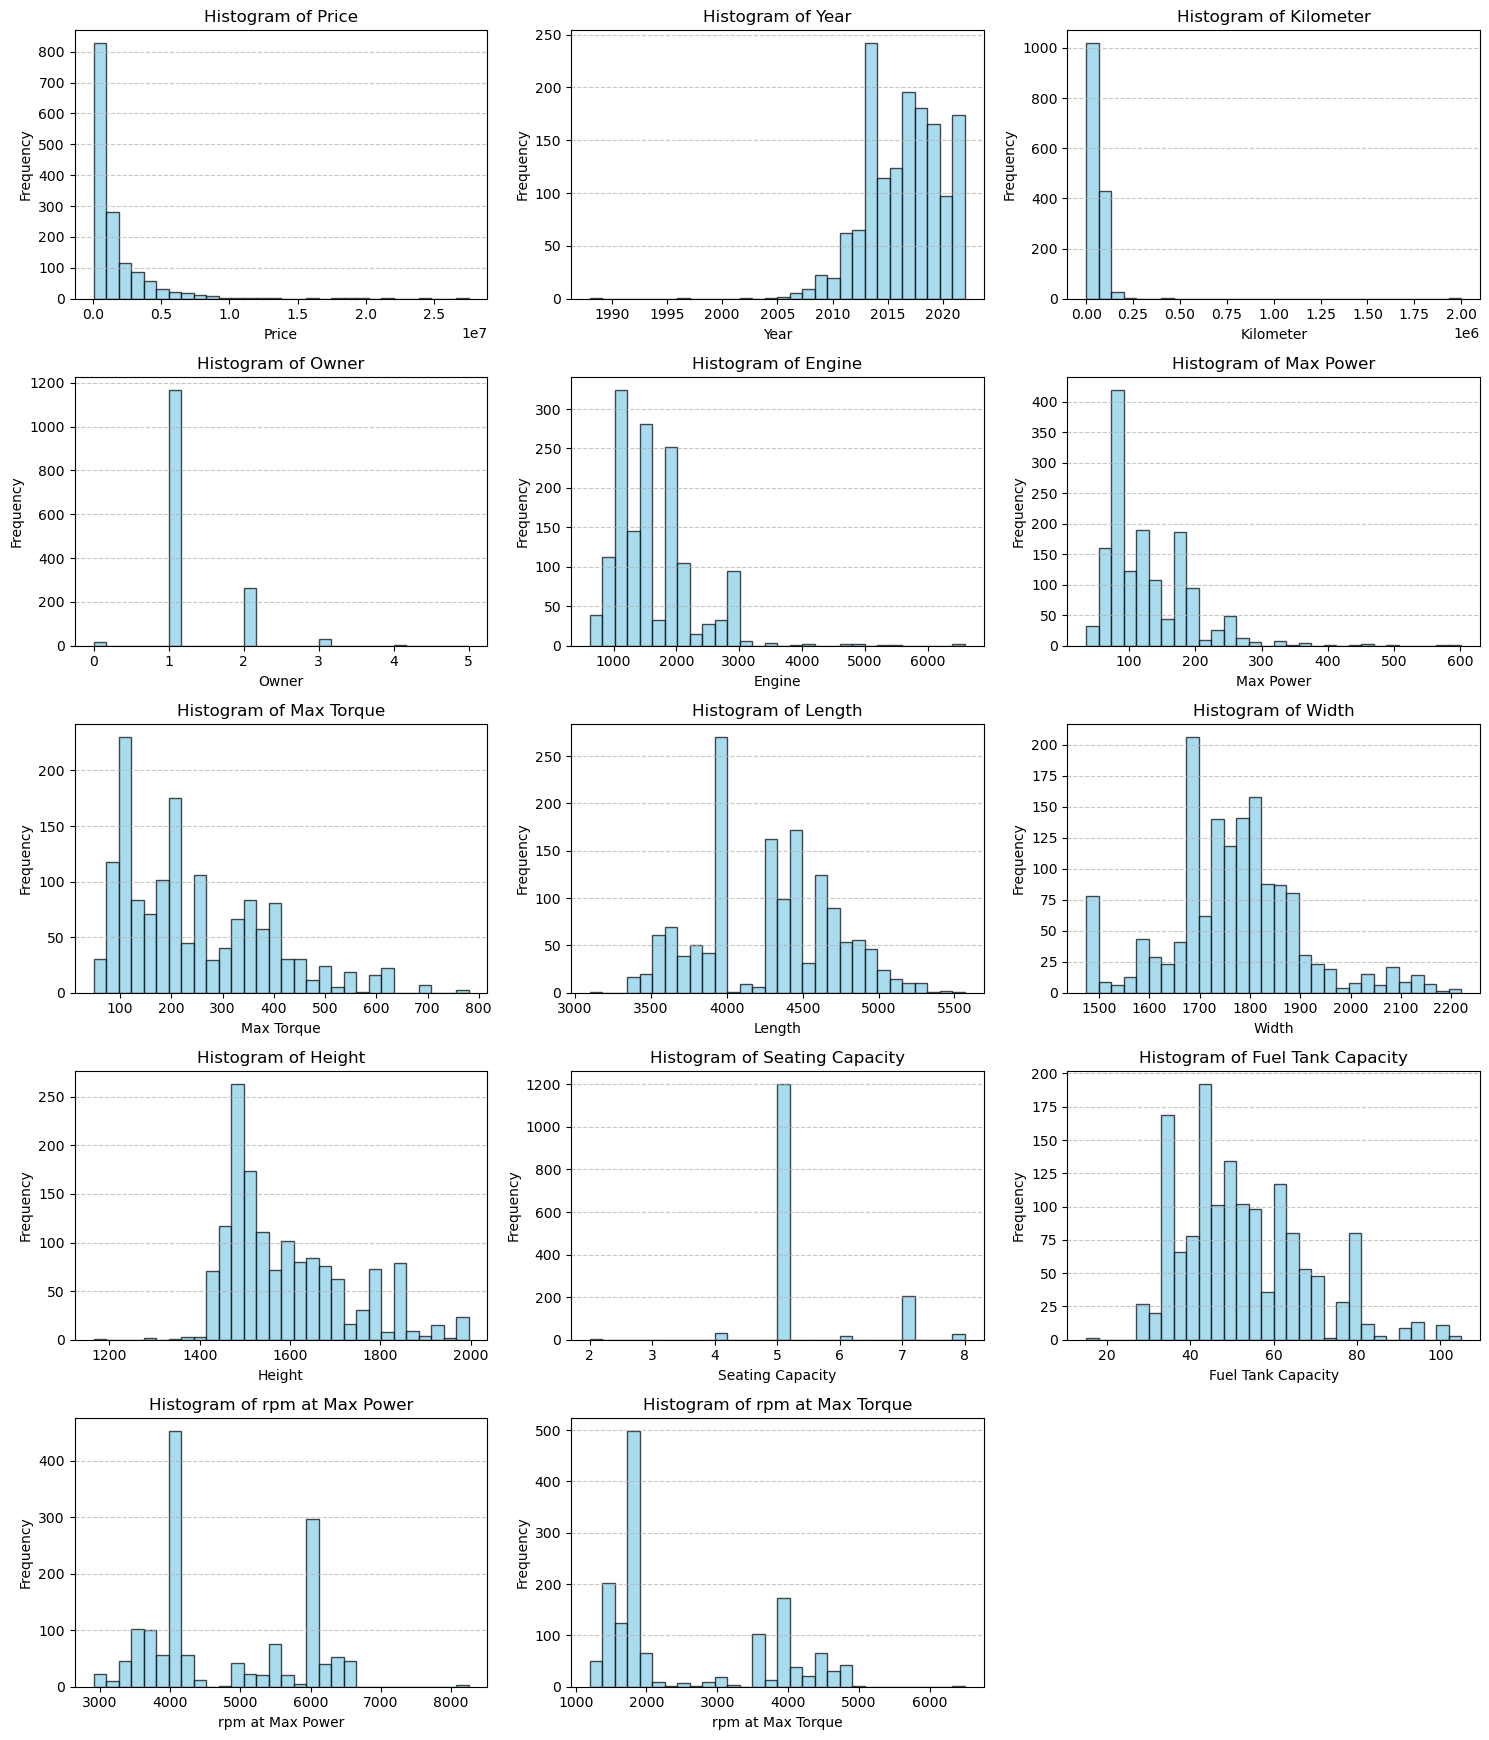

In [21]:
# 2. Plot the distribution of numeric columns
train_data.plot_distribution_of_numeric_columns()

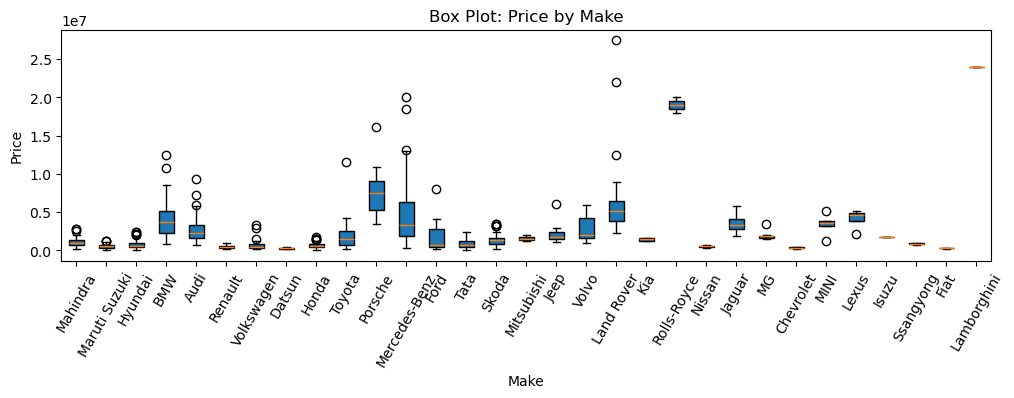

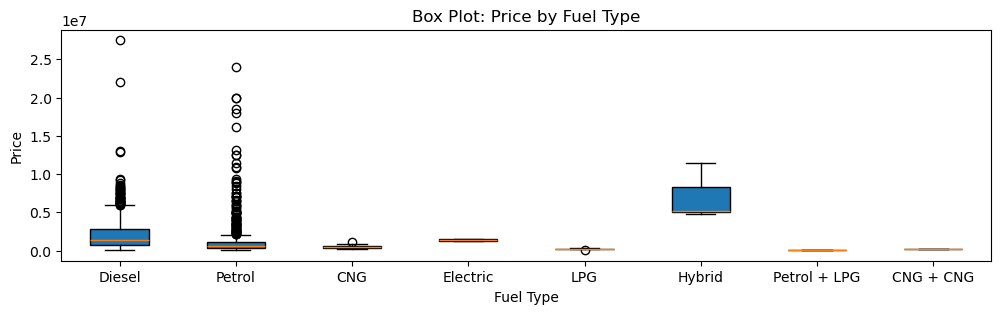

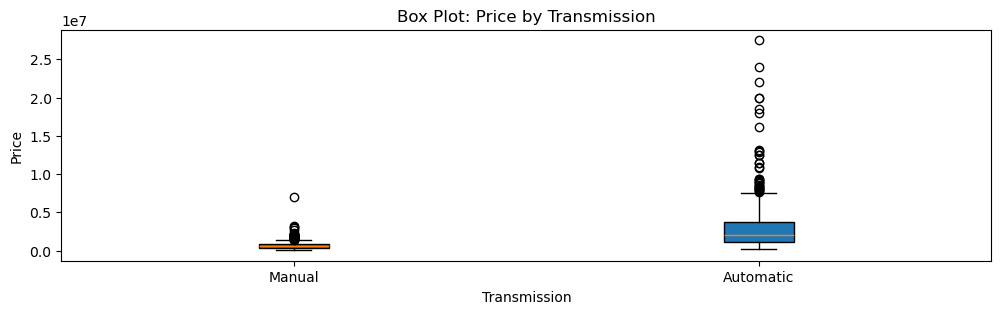

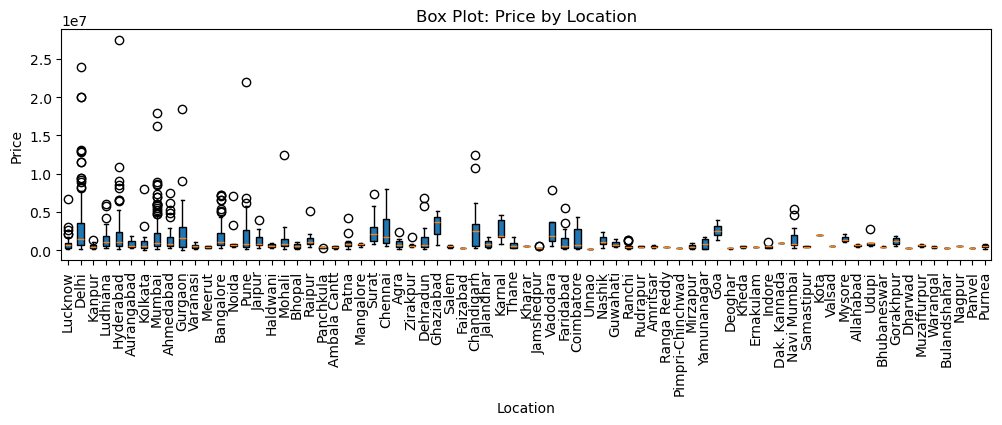

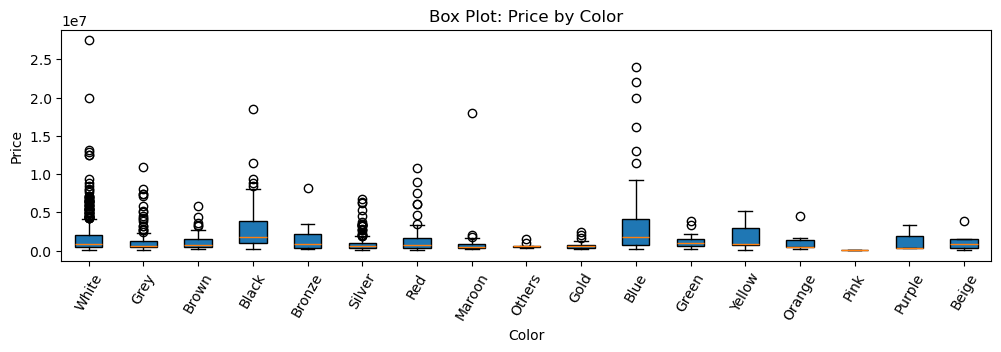

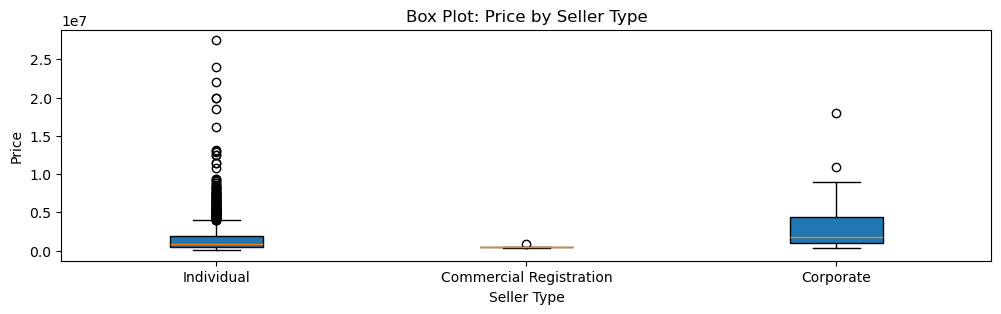

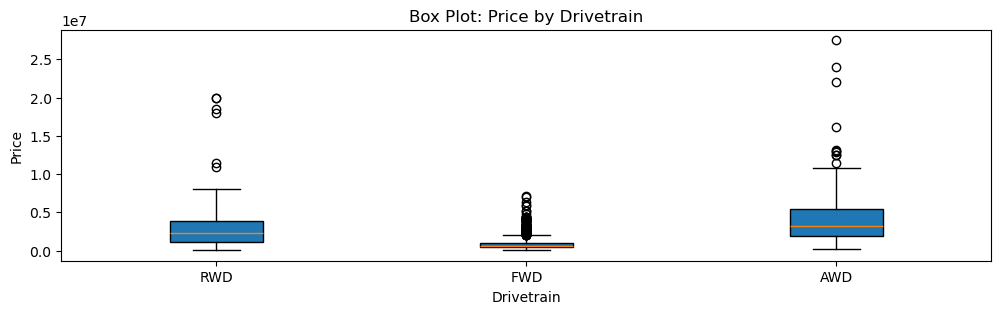

In [22]:
# 3. Box plot: Relationship between Price and Object Columns
train_data.box_plot_for_object_columns()

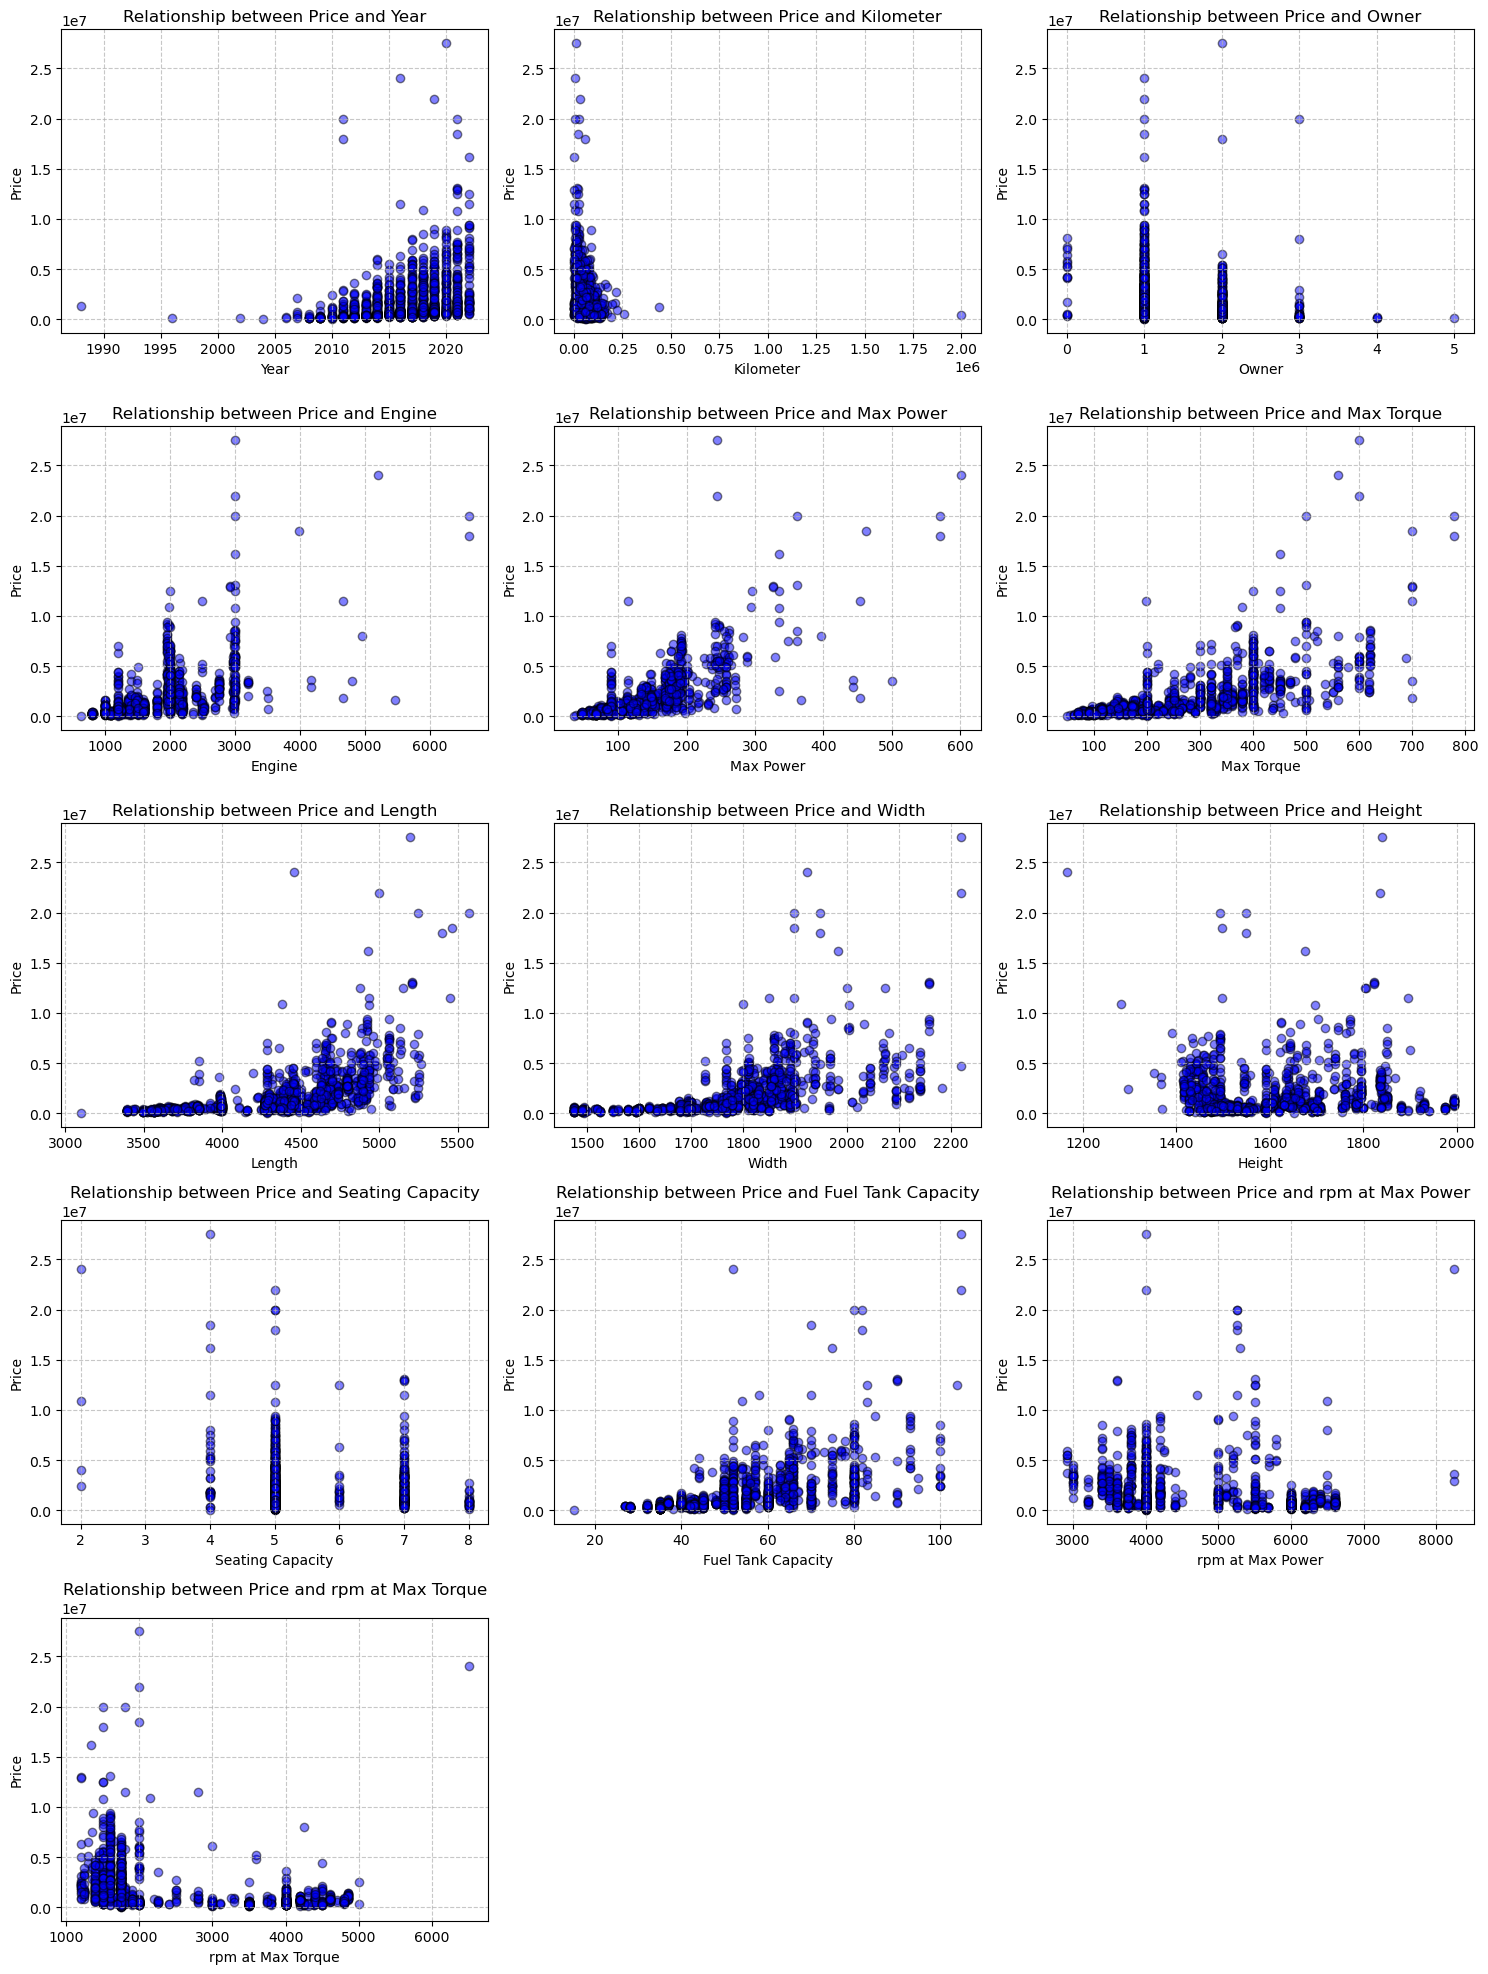

In [23]:
# 4. Scatter Plot: Relationship between Price and Numeric Columns
train_data.scatter_plot_for_numeric_columns()

## Part IV: Data Encoding and Data Normalization

#### IV.1: Train set and Validation set
We will use train data and validation data (after preprocessing)
- train_data_after_preprocessing
- validation_data_after_preprocessing

In [24]:
train_data = copy.deepcopy(train_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = train_data.unique_values()
print()
validation_data = copy.deepcopy(validation_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = validation_data.unique_values()

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 912), ('Fuel Type', 8), ('Transmission', 2), ('Location', 73), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 534), ('Year', 21), ('Kilometer', 649), ('Owner', 6), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]

Object Columns and number of unique values: 8
[('Make', 21), ('Model', 133), ('Fuel Type', 3), ('Transmission', 2), ('Location', 41), ('Color', 13), ('Seller Type', 2), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 137), ('Year', 15), ('Kilometer', 125), ('Owner', 4), ('Engine', 44), ('Max Power', 60), ('Max Torque', 56), ('Length', 73), ('Width', 68), ('Height', 69), ('Seating Capacity', 5), ('Fuel Tank Capacity', 34), ('rpm at Max Power', 22), 

#### IV.2: Data Encoding

In [25]:
# Encode the training data 
encoding_information = train_data.encode_data()
train_data.get_column_after_transform_info()

Data encoding completed!

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,float64,0,31,520500.0
1,Model,Mẫu xe,float64,0,516,375000.0
2,Price,Giá xe (VNĐ),int64,0,534,425000.0
3,Year,Năm sản xuất,int64,0,21,2017.0
4,Kilometer,Số km đã đi,int64,0,649,65000.0
5,Fuel Type,Loại nhiên liệu,int64,0,2,0.0
6,Transmission,Hộp số,int64,0,2,0.0
7,Location,Địa điểm bán,int64,0,2,1.0
8,Color,Màu xe,int64,0,2,0.0
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1.0


In [26]:
# Encode the validation data
validation_data.encode_data_test_set(encoding_information)
validation_data.get_column_after_transform_info()

Data encoding completed!

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,float64,0,21,520500.0
1,Model,Mẫu xe,float64,0,121,390000.0
2,Price,Giá xe (VNĐ),int64,0,137,400000.0
3,Year,Năm sản xuất,int64,0,15,2018.0
4,Kilometer,Số km đã đi,int64,0,125,42000.0
5,Fuel Type,Loại nhiên liệu,int64,0,1,0.0
6,Transmission,Hộp số,int64,0,2,0.0
7,Location,Địa điểm bán,int64,0,2,1.0
8,Color,Màu xe,int64,0,2,0.0
9,Owner,Số chủ sở hữu trước đó,int64,0,4,1.0


In [27]:
# Create save point: after encoding
train_data_after_encoding = copy.deepcopy(train_data)
validation_data_after_encoding = copy.deepcopy(validation_data)

#### IV.3: Data Normalization

##### Training set normalization

In [28]:
train_data = copy.deepcopy(train_data_after_encoding)
train_data.data.describe()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,1.482000e+03,1.482000e+03,1.482000e+03,1482.000000,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,...,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,1.425366e+06,1.682453e+06,1.687759e+06,2016.419028,5.449823e+04,0.002024,0.456815,0.570850,0.171390,1.219298,...,128.336707,244.719973,1.423077,4286.240216,1767.606613,1592.678138,5.307018,52.168016,4718.878543,2509.032389
std,1.522470e+06,2.324761e+06,2.338998e+06,3.419646,6.091304e+04,0.044962,0.498300,0.495122,0.376977,0.506359,...,64.438220,139.052933,0.715286,441.102679,133.083363,135.655454,0.815658,14.953025,1068.857487,1166.725297
min,2.700000e+05,4.900000e+04,4.900000e+04,1988.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.000000,48.000000,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,2910.000000,1200.000000
25%,5.205000e+05,4.750000e+05,4.812498e+05,2014.000000,2.900000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,...,83.000000,115.000000,1.000000,3990.000000,1695.000000,1485.000000,5.000000,42.000000,4000.000000,1700.000000
50%,6.250000e+05,8.114995e+05,8.250000e+05,2017.000000,4.981650e+04,0.000000,0.000000,1.000000,0.000000,1.000000,...,113.000000,200.000000,1.000000,4327.000000,1767.000000,1550.000000,5.000000,50.000000,4000.000000,1750.000000
75%,1.975000e+06,1.937000e+06,1.900000e+06,2019.000000,7.200000e+04,0.000000,1.000000,1.000000,0.000000,1.000000,...,169.000000,343.000000,2.000000,4624.000000,1831.000000,1671.000000,5.000000,60.000000,6000.000000,4000.000000
max,2.400000e+07,2.750000e+07,2.750000e+07,2022.000000,2.000000e+06,1.000000,1.000000,1.000000,1.000000,5.000000,...,602.000000,780.000000,3.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,8250.000000,6500.000000


In [29]:
range_vals, min_vals, max_vals = train_data.normalize_data()
train_data_after_normalization = copy.deepcopy(train_data) # after normalization
train_data_after_normalization.data.describe()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 31), ('Model', 516), ('Price', 534), ('Year', 21), ('Kilometer', 649), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Drivetrain', 3), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,1482.000000,1482.000000,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,...,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,0.048688,0.059504,1.687759e+06,0.835854,0.731994,0.002024,0.456815,0.570850,0.171390,0.243860,...,0.164615,0.268743,0.211538,0.480664,0.392761,0.515275,0.551170,0.412978,0.338741,0.246987
std,0.064158,0.084688,2.338998e+06,0.100578,0.064064,0.044962,0.498300,0.495122,0.376977,0.101272,...,0.113648,0.189963,0.357643,0.178584,0.178635,0.163440,0.135943,0.166145,0.200161,0.220137
min,0.000000,0.000000,4.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010556,0.015519,4.812498e+05,0.764706,0.708204,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.084656,0.091530,0.000000,0.360729,0.295302,0.385542,0.500000,0.300000,0.204120,0.094340
50%,0.014960,0.027777,8.250000e+05,0.852941,0.745494,0.000000,0.000000,1.000000,0.000000,0.200000,...,0.137566,0.207650,0.000000,0.497166,0.391946,0.463855,0.500000,0.388889,0.204120,0.103774
75%,0.071850,0.068777,1.900000e+06,0.911765,0.770880,0.000000,1.000000,1.000000,0.000000,0.200000,...,0.236332,0.403005,0.500000,0.617409,0.477852,0.609639,0.500000,0.500000,0.578652,0.528302
max,1.000000,1.000000,2.750000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
range_vals, min_vals, max_vals 
# print range_vals, min_vals, max_vals  size
print(range_vals.size, min_vals.size, max_vals.size)

21 21 21


##### Validation set normalization

In [31]:
validation_data = copy.deepcopy(validation_data_after_encoding)
validation_data.data.describe()
validation_data.data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
0,520500.0,590000.0,425000,2015,36528,0,0,0,1,3,...,74,190,1,3850.0,1695.0,1530.0,5,42,4000,2000
1,1390000.0,595000.0,745000,2016,117048,0,0,1,0,1,...,105,250,1,4386.0,1699.0,1466.0,5,55,4400,2500
2,520500.0,169000.0,189000,2008,19759,0,0,1,1,1,...,47,62,1,3495.0,1475.0,1460.0,5,35,4000,1750
3,3295000.0,7390000.0,5200000,2020,18000,0,1,0,0,1,...,192,400,2,5063.0,1860.0,1494.0,5,80,3800,1600
4,5100000.0,22000000.0,19300000,2019,63000,0,1,1,1,1,...,244,600,3,4999.0,2220.0,1835.0,5,105,4000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,520500.0,425000.0,599000,2015,72000,0,0,0,0,1,...,89,200,1,4265.0,1695.0,1685.0,7,45,4000,1750
161,3295000.0,9050000.0,8300000,2020,50000,0,1,1,0,1,...,241,500,3,4924.0,2157.0,1772.0,5,93,4200,1600
162,520500.0,390000.0,390000,2015,43297,0,0,0,0,1,...,67,90,1,3599.0,1495.0,1700.0,5,35,6200,3500
163,625000.0,250000.0,300000,2014,40000,0,0,0,0,1,...,83,113,1,3995.0,1710.0,1505.0,5,45,6000,4000


In [32]:
validation_data.normalize_data_test_set(range_vals, min_vals)
validation_data_after_normalization = copy.deepcopy(validation_data) # after normalization
validation_data_after_normalization.data.describe()

Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 21), ('Model', 121), ('Price', 137), ('Year', 15), ('Kilometer', 125), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 44), ('Max Power', 60), ('Max Torque', 56), ('Drivetrain', 3), ('Length', 73), ('Width', 68), ('Height', 69), ('Seating Capacity', 5), ('Fuel Tank Capacity', 34), ('rpm at Max Power', 22), ('rpm at Max Torque', 22)]
Data normalization completed!


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm at Max Power,rpm at Max Torque
count,165.000000,165.000000,1.650000e+02,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.00000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.052964,0.065210,1.776558e+06,0.836007,0.733691,0.0,0.418182,0.581818,0.187879,0.242424,...,0.163647,0.267528,0.20000,0.461767,0.392166,0.512012,0.540404,0.409899,0.336416,0.248396
std,0.077709,0.099167,2.553114e+06,0.085265,0.050319,0.0,0.494762,0.494762,0.391804,0.100700,...,0.118551,0.194135,0.35269,0.177934,0.201916,0.145272,0.116625,0.169115,0.198935,0.223453
min,0.006216,0.004371,1.450000e+05,0.588235,0.568615,0.0,0.000000,0.000000,0.000000,0.000000,...,0.007055,0.008197,0.00000,0.160324,0.000000,0.272289,0.333333,0.144444,0.000000,0.000000
25%,0.010556,0.014790,4.650000e+05,0.794118,0.710540,0.0,0.000000,0.000000,0.000000,0.200000,...,0.082892,0.090164,0.00000,0.352632,0.295302,0.396386,0.500000,0.300000,0.204120,0.103774
50%,0.014960,0.029179,8.750000e+05,0.852941,0.745748,0.0,0.000000,1.000000,0.000000,0.200000,...,0.139330,0.207650,0.00000,0.474089,0.402685,0.469880,0.500000,0.388889,0.204120,0.103774
75%,0.083439,0.084715,2.190000e+06,0.882353,0.768938,0.0,1.000000,1.000000,0.000000,0.200000,...,0.238095,0.403005,0.50000,0.601619,0.477852,0.618072,0.500000,0.500000,0.578652,0.528302
max,0.789296,0.799643,2.000000e+07,1.000000,0.819131,0.0,1.000000,1.000000,1.000000,0.600000,...,0.943563,1.000000,1.00000,1.000000,1.000000,0.861446,1.000000,1.000000,0.691011,0.688679


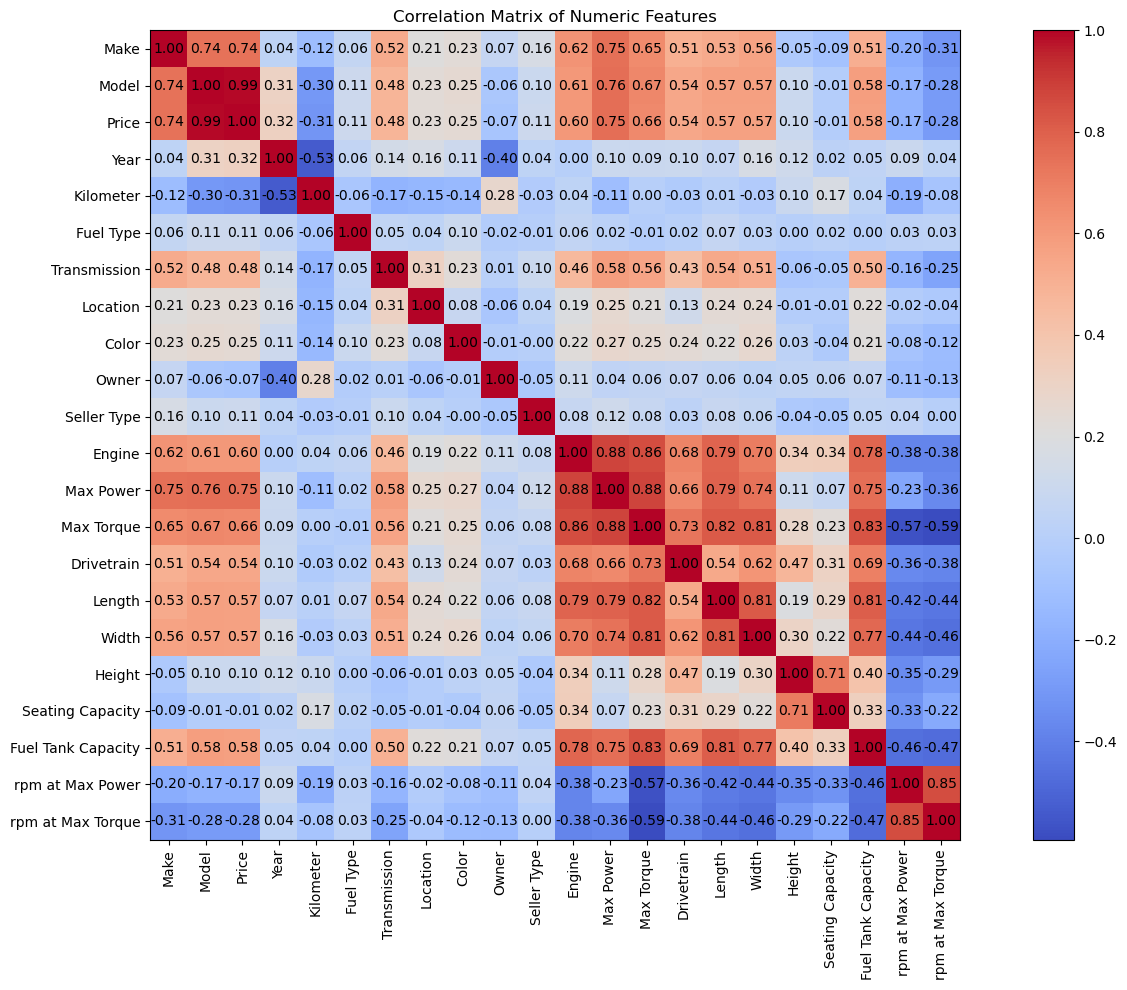

In [33]:
train_data_after_normalization.plot_corr_matrix(15, 10)

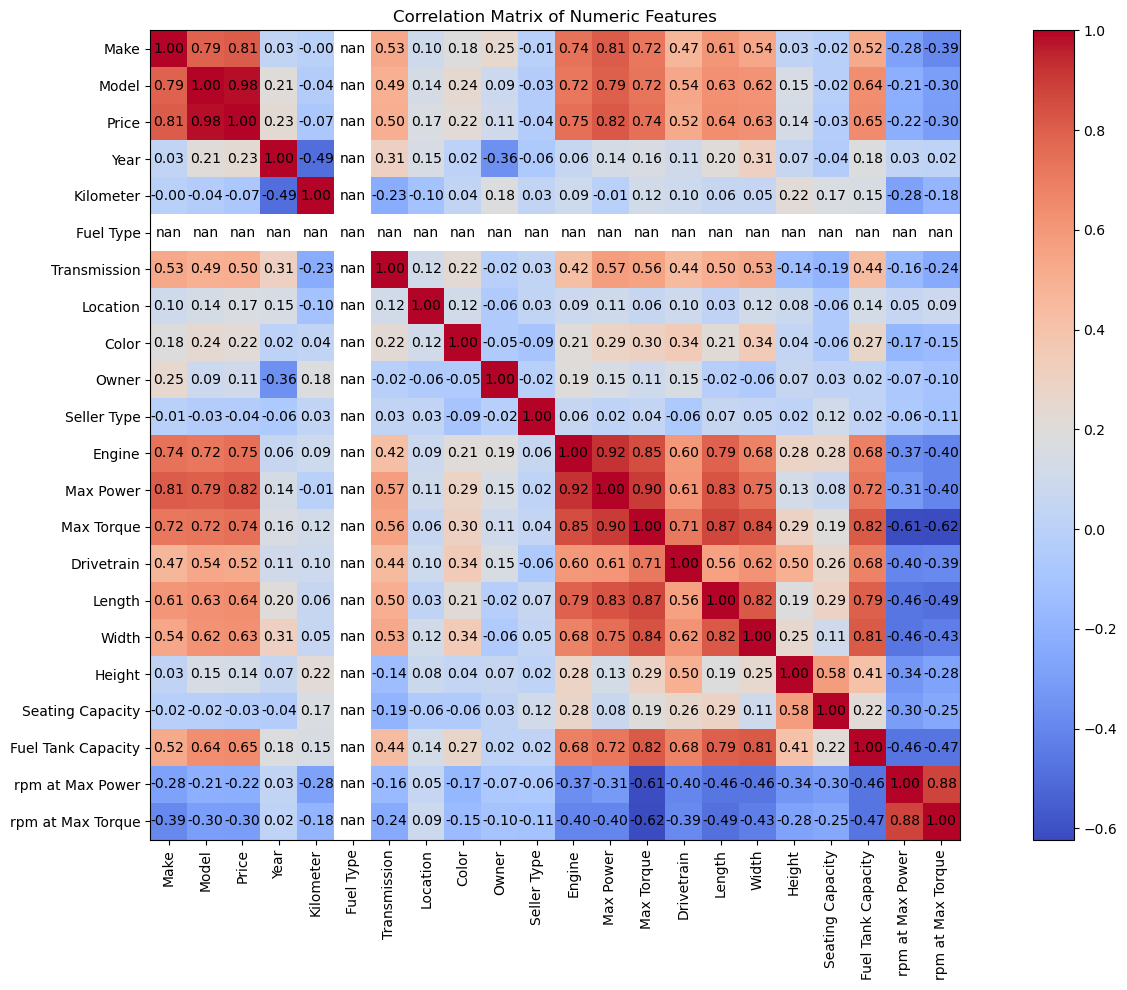

In [34]:
validation_data_after_normalization.plot_corr_matrix(15, 10)

## Part V: Split dataset and tools to evaluate models

#### V.1: Split dataset
Split training set into X_train and y_train. Split validation set into X_val and y_val.

In [35]:
train_data = copy.deepcopy(train_data_after_normalization)
validation_data = copy.deepcopy(validation_data_after_normalization)
numeric_columns, object_columns = train_data.numeric_columns, train_data.object_columns
print(numeric_columns, len(numeric_columns))

train_data = train_data.data
validation_data = validation_data.data

# X_train, y_train from train_data
# X_val, y_val from validation_data

X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

X_val = validation_data.drop(columns=['Price'])
y_val = validation_data['Price']

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm at Max Power',
       'rpm at Max Torque'],
      dtype='object') 22


#### V.2: Tools to evaluate the models

In [36]:
# Function to evaluate the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (SSE / SST) # R^2 = 1 - SSE/SST = SSR/SST

def evaluate_model(y_true, y_pred):
    model_eval = pd.DataFrame({
        'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
        'Value': [mse(y_true, y_pred), rmse(y_true, y_pred), mae(y_true, y_pred), r2_score(y_true, y_pred)]
    })
    return model_eval

## Part VI: Simple Linear Regression model from Statistics's point of view

Based on Correlation coefficient map, **Model** maybe the best feature for model. We will prove it.

In [37]:
# Y = beta0 + beta1*X
# beta1 = Sxx / Sxy
# beta0 = mean(Y) - beta1 * mean(X)
# Sxx = sum((X - mean(X))^2)
# Sxy = sum((X - mean(X)) * (Y - mean(Y)))

def simple_linear_regression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

result = []

for F in numeric_columns.drop(['Price']):
    # Predict the price of a car based on feature F
    beta0, beta1 = simple_linear_regression(X_train[F], y_train)
    # print(f"{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

    # Predict the price of a car based on feature F
    y_pred = beta0 + beta1 * X_train[F]

    # Evaluate the model on train set
    model_eval = evaluate_model(y_train, y_pred)
    result.append([F, model_eval, beta0, beta1])

Metric = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for i, metric in enumerate(Metric):
    best = result[0]
    for res in result:
        if (res[1].iloc[i, 1] < best[1].iloc[i, 1] and metric != 'R^2 Score') or \
           (res[1].iloc[i, 1] > best[1].iloc[i, 1] and metric == 'R^2 Score'):
            best = res
    print(f"Best feature for {metric}: {best[0]}. Value: {best[1].iloc[i, 1]}")

print(f"\nConclusion: {best[0]} is the best feature for all metrics")
# => Max Power (best[0]) is the best feature for all metrics 
id_BestFeature_in_result = [i for i in range(len(result)) if result[i][0] == best[0]][0]

beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]
F = result[id_BestFeature_in_result][0]
print(f"\n{F} formula: Price = {beta0:.2f} + {beta1:.2f} * {F}")

print("\nEvaluation metrics on Training Set:")
result[id_BestFeature_in_result][1]

Best feature for Mean Squared Error: Model. Value: 67963864501.90363
Best feature for Root Mean Squared Error: Model. Value: 260698.8003461152
Best feature for Mean Absolute Error: Model. Value: 95879.59879165197
Best feature for R^2 Score: Model. Value: 0.9875688394805842

Conclusion: Model is the best feature for all metrics

Model formula: Price = 54550.09 + 27446903.93 * Model

Evaluation metrics on Training Set:


,Metric,Value
0,Mean Squared Error,6.796386e+10
1,Root Mean Squared Error,2.606988e+05
2,Mean Absolute Error,9.587960e+04
3,R^2 Score,9.875688e-01


In [38]:
# Best model on training set:
print(f'Best feature: {result[id_BestFeature_in_result][0]}')
beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]

# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_train[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df.head(10)

Best feature: Model


,Actual,Predicted
0,925000,880427
1,2540000,2545178
2,250000,305513
3,500000,465488
4,2400000,2405199
5,550000,555475
6,1400000,1842783
7,1395000,2955117
8,1850000,1605319
9,1639999,1645312


In [39]:
print("\nEvaluation metrics on Validation Set:")
y_pred = beta0 + beta1 * X_val['Model']

model_eval = evaluate_model(y_val, y_pred)
model_eval


Evaluation metrics on Validation Set:


,Metric,Value
0,Mean Squared Error,2.926977e+11
1,Root Mean Squared Error,5.410154e+05
2,Mean Absolute Error,2.869374e+05
3,R^2 Score,9.548228e-01


In [40]:
# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_val[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,425000,595469
1,745000,600469
2,189000,174532
3,5200000,7394455
4,19300000,22002275
5,625000,740447
6,459999,304513
7,1725000,1665810
8,1475000,1282867
9,5175000,5504737


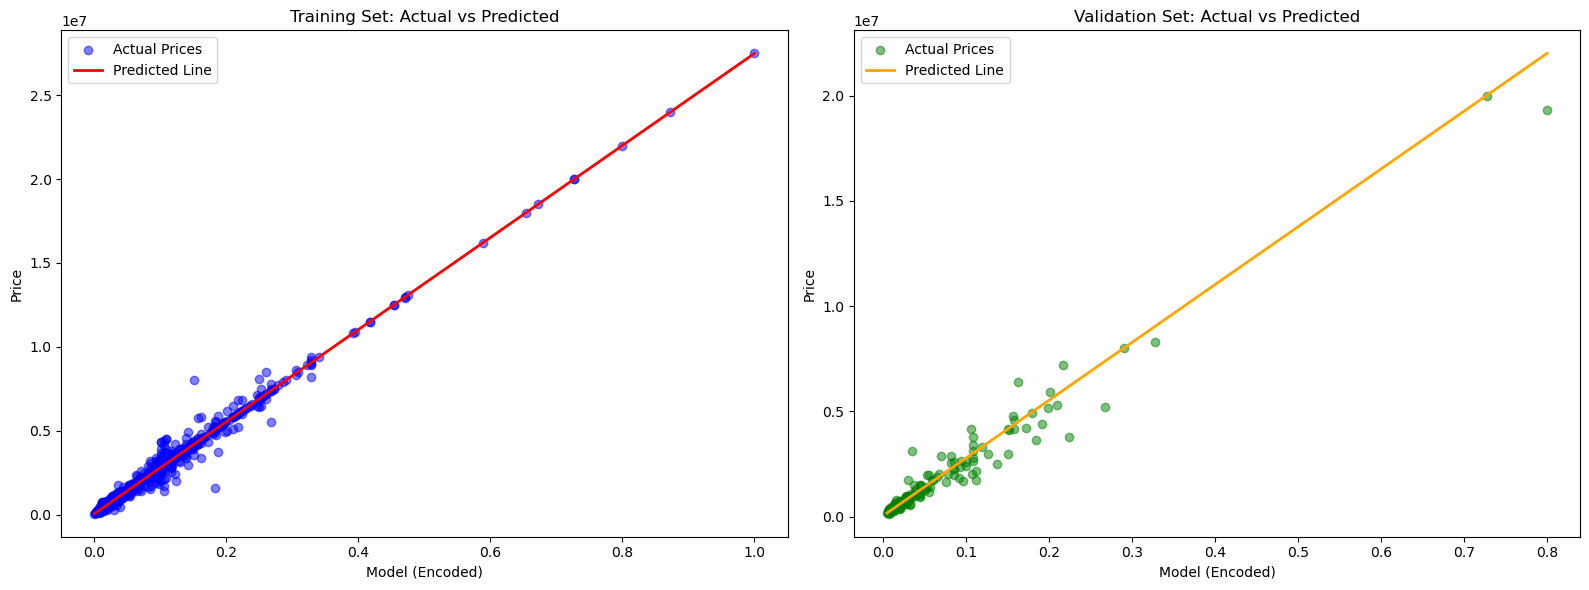

In [41]:
# Plot line of best fit

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(X_train['Model'], y_train, color='blue', alpha=0.5, label='Actual Prices')
sorted_idx_train = X_train['Model'].argsort()
X_sorted_train = X_train['Model'].iloc[sorted_idx_train]
y_line_train = beta0 + beta1 * X_sorted_train
axes[0].plot(X_sorted_train, y_line_train, color='red', linewidth=2, label='Predicted Line')
axes[0].set_xlabel("Model (Encoded)")
axes[0].set_ylabel("Price")
axes[0].set_title("Training Set: Actual vs Predicted")
axes[0].legend()

# Validation set
axes[1].scatter(X_val['Model'], y_val, color='green', alpha=0.5, label='Actual Prices')
sorted_idx_val = X_val['Model'].argsort()
X_sorted_val = X_val['Model'].iloc[sorted_idx_val]
y_line_val = beta0 + beta1 * X_sorted_val
axes[1].plot(X_sorted_val, y_line_val, color='orange', linewidth=2, label='Predicted Line')
axes[1].set_xlabel("Model (Encoded)")
axes[1].set_ylabel("Price")
axes[1].set_title("Validation Set: Actual vs Predicted")
axes[1].legend()

plt.tight_layout()
plt.show()

## Part VII: Multiple Linear Regression model

### VII.1 Build Model

In [42]:
class MultiLinearRegression:
    def __init__(self, X_train, y_train, X_val, y_val):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.thetas = np.zeros(self.X_train.shape[1])
        self.train_predictions = None
        self.val_predictions = None
        self.train_losses = []
        self.val_losses = []
        self.epochs = None

    def predict(self, X):
        """Make predictions for given input data"""
        return np.dot(X, self.thetas)

    def compute_loss(self, predictions, y):
        """Calculate mean squared error"""
        return np.mean((predictions - y) ** 2) / 2

    def gradient(self, X, predictions, y):
        """Compute gradients for weight updates"""
        return np.dot(X.T, (predictions - y)) / len(y)

    def update_weights(self, learning_rate, gradient):
        """Update model parameters"""
        return self.thetas - learning_rate * gradient

    def train(self, epochs, learning_rate, log_interval, adam=False):
        """Train the model using gradient descent"""
        self.epochs = epochs
        for epoch in range(epochs):
            # Training predictions and loss
            self.train_predictions = self.predict(self.X_train)
            train_loss = self.compute_loss(self.train_predictions, self.y_train)
            self.train_losses.append(train_loss)

            # Validation predictions and loss
            self.val_predictions = self.predict(self.X_val)
            val_loss = self.compute_loss(self.val_predictions, self.y_val)
            self.val_losses.append(val_loss)

            # Update weights
            grad = self.gradient(self.X_train, self.train_predictions, self.y_train)
            self.thetas = self.update_weights(learning_rate, grad)

            if epoch % log_interval == 0:
                print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

        return self.thetas, self.train_losses, self.val_losses

    def get_parameters(self):
        """Return current model parameters"""
        return self.thetas

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.train_losses)), self.train_losses,
                label='Training Loss', color='blue', linewidth=2)
        plt.plot(range(len(self.val_losses)), self.val_losses,
                label='Validation Loss', color='red', linewidth=2)

        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title('Training and Validation Loss over Epochs', fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Set log scale for better visualization if losses vary greatly
        plt.yscale('log')

        plt.tight_layout()
        plt.show()

### VII.2 Cross validation functions

In [43]:
# Cross validation function
def k_fold_cross_validation(self, model_class, k, epochs, learning_rate, log_interval, kind=None, adam=False):
    losses_of_each_cross = {}
    train_set = copy.deepcopy(self)
    val_set = copy.deepcopy(self)

    for i in range(k):
        train_end_1 = int(i/k * len(self.data))
        train_start_2 = int((i + 1)/k * len(self.data))

        val_start = int(i/k * len(self.data))
        val_end = int((i + 1)/k * len(self.data))

        train_set.data = pd.concat([self.data.iloc[:train_end_1], self.data.iloc[train_start_2:]], axis=0).copy()
        val_set.data = self.data.iloc[val_start:val_end].copy()

        train_set.encode_data()
        val_set.encode_data()

        train_set.normalize_data()
        val_set.normalize_data()

        train_data = train_set.data
        val_data = val_set.data

        X_train = train_data.drop(columns=['Price'])
        y_train = train_data['Price']
        X_train, y_train = process_data(X_train, y_train, kind)

        X_val = val_data.drop(columns=['Price'])
        y_val = val_data['Price']
        X_val, y_val = process_data(X_val, y_val, kind)

        print(f"Cross {i}: ")
        multiLR = model_class(X_train, y_train, X_val, y_val)
        _, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval, adam)

        loss = {
            f'Cross {i + 1}': {
                'Train loss': train_losses,
                'Val loss': val_losses
            }
        }
        losses_of_each_cross.update(loss)

        print('\n')

    return losses_of_each_cross

DataProcessor.k_fold_cross_validation = k_fold_cross_validation

In [44]:
def plot_cross_validation(cross_validation_losses):
    k = len(cross_validation_losses)

    ncols = int(np.ceil(np.sqrt(k)))
    nrows = int(np.ceil(k / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows), sharex=True, sharey=False)

    if nrows == 1:
        axes = np.array([axes]) if ncols > 1 else np.array([axes])
    else:
        axes = np.array(axes)

    for idx, (cross, losses) in enumerate(cross_validation_losses.items()):
        train_losses = losses['Train loss']
        val_losses = losses['Val loss']

        epochs = range(1, len(train_losses) + 1)

        row = idx // ncols
        col = idx % ncols

        axes[row, col].plot(epochs, train_losses, label='Train Loss', linestyle='-', color='blue', alpha=0.7)

        axes[row, col].plot(epochs, val_losses, label='Val Loss', linestyle='--', color='orange', alpha=0.7)

        axes[row, col].set_title(f'{cross}')
        axes[row, col].set_ylabel('Loss')
        axes[row, col].legend()
        axes[row, col].grid(True)

        if row == nrows - 1:
            axes[row, col].set_xlabel('Epoch')

    for idx in range(k, nrows * ncols):
        row = idx // ncols
        col = idx % ncols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

### VII.3 Prepare data

In [45]:
# Process data to fit different methods
def process_data(X, y, kind: str):
    if kind == 'bias':
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    elif kind == 'custom':
        y = y / 1e7
    elif kind == 'log':
        y = np.log(y)
    elif kind == 'min_max':
        min_y = np.min(y)
        max_y = np.max(y)
        y = (y - min_y) / (max_y - min_y)
    elif kind == 'standardization':
        mean_y = np.mean(y)
        std_y = np.std(y)
        y = (y - mean_y) / std_y

    return X, y

In [46]:
# Add bias
X_train_bias = np.hstack((np.ones(shape=(X_train.shape[0], 1)), X_train))
X_val_bias = np.hstack((np.ones(shape=(X_val.shape[0], 1)), X_val))

# Custom
y_train_custom = y_train / 1e7
y_val_custom = y_val / 1e7

# Log transformation
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# Min-Max scaler
train_min = np.min(y_train)
train_max = np.max(y_train)

val_min = np.min(y_val)
val_max = np.max(y_val)

y_train_scaled = (y_train - train_min) / (train_max - train_min)
y_val_scaled = (y_val - val_min) / (val_max - val_min)

# Standardization
train_mean = np.mean(y_train)
train_std = np.std(y_train)
val_mean = np.mean(y_val)
val_std = np.std(y_val)

y_train_standardized = (y_train - train_mean) / train_std
y_val_standardized = (y_val - val_mean) / val_std

In [47]:
# List to record results
evaluations = []
evaluations_label_normalized = []

In [48]:
# Models dictionary
models = {}

We will experimenting different methods to find out which one works out the best. Base model is using all features and no bias. Next models are built to be expected to outperform this one.

### VII.4 Training

##### Without bias (base)

In [49]:
epochs = 10000
learning_rate = 0.2
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [50]:
multiLR = MultiLinearRegression(X_train, y_train, X_val, y_val)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['base'] = multiLR

Epoch: 0 | Train Loss: 4157874321495.3018 | Val Loss: 4817519960484.8662
Epoch: 1000 | Train Loss: 284234449928.2568 | Val Loss: 265058110893.9723
Epoch: 2000 | Train Loss: 131383855271.7491 | Val Loss: 127671724065.9054
Epoch: 3000 | Train Loss: 79721604723.3406 | Val Loss: 102282059069.8682
Epoch: 4000 | Train Loss: 58266086928.5905 | Val Loss: 101378719932.9789
Epoch: 5000 | Train Loss: 47999845948.1854 | Val Loss: 105890355964.4450
Epoch: 6000 | Train Loss: 42457769828.1052 | Val Loss: 110861587577.9115
Epoch: 7000 | Train Loss: 39173708880.2957 | Val Loss: 115139617033.5529
Epoch: 8000 | Train Loss: 37098178070.8779 | Val Loss: 118614370464.5444
Epoch: 9000 | Train Loss: 35730085081.3304 | Val Loss: 121416876044.3520


In [51]:
# Cross validation
k = 4
kind = None
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

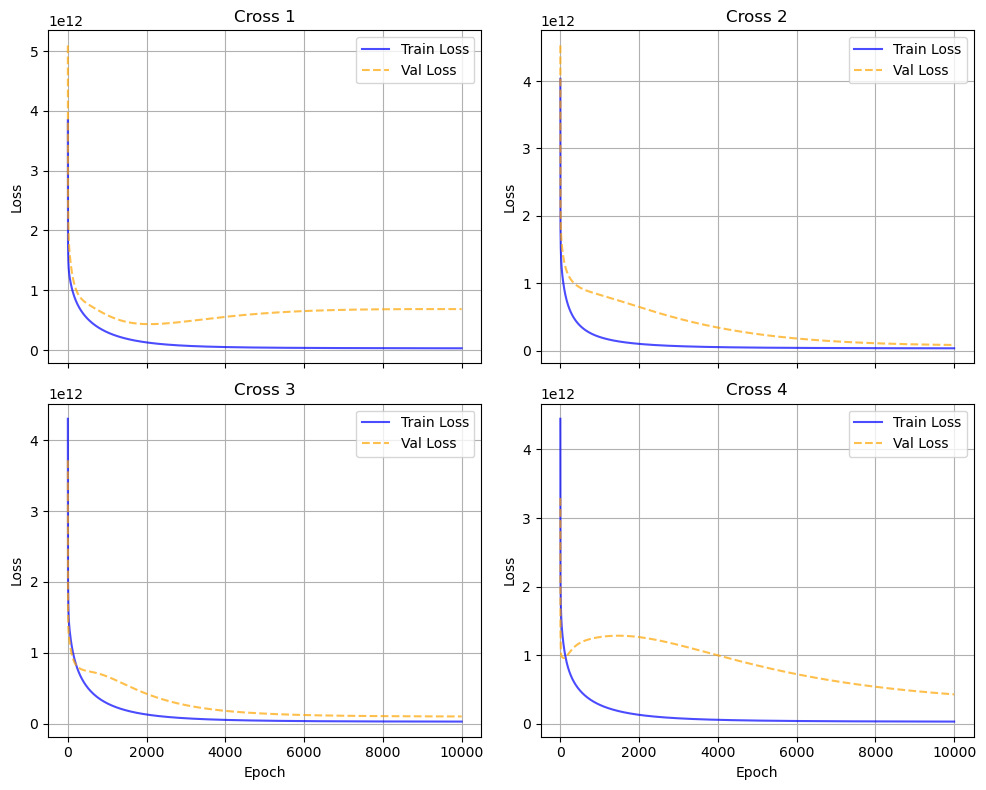

In [52]:
plot_cross_validation(cross_validation_losses)

The sudden spike in some crosses is most likely due to noise or mismatch in distributions between train set and validation set.

In [53]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

##### With bias

We will add a bias parameter to increase model's complexity.

In [54]:
epochs = 10000
learning_rate = 0.2
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [55]:
multiLR = MultiLinearRegression(X_train_bias, y_train, X_val_bias, y_val)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['bias'] = multiLR

Epoch: 0 | Train Loss: 4157874321495.3018 | Val Loss: 4817519960484.8662
Epoch: 1000 | Train Loss: 284393301503.6704 | Val Loss: 264641006267.9266
Epoch: 2000 | Train Loss: 131424456724.7111 | Val Loss: 127777098771.2321
Epoch: 3000 | Train Loss: 79701763654.1970 | Val Loss: 102550316846.2160
Epoch: 4000 | Train Loss: 58264381317.5507 | Val Loss: 101708759308.3874
Epoch: 5000 | Train Loss: 48019189251.4752 | Val Loss: 106231260517.5178
Epoch: 6000 | Train Loss: 42488633854.4692 | Val Loss: 111191589254.9428
Epoch: 7000 | Train Loss: 39209611701.5317 | Val Loss: 115450867103.7111
Epoch: 8000 | Train Loss: 37135575511.5840 | Val Loss: 118903540255.8762
Epoch: 9000 | Train Loss: 35766864179.7773 | Val Loss: 121681616479.9691


In [56]:
# Cross validation
k = 4
kind = 'bias'
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

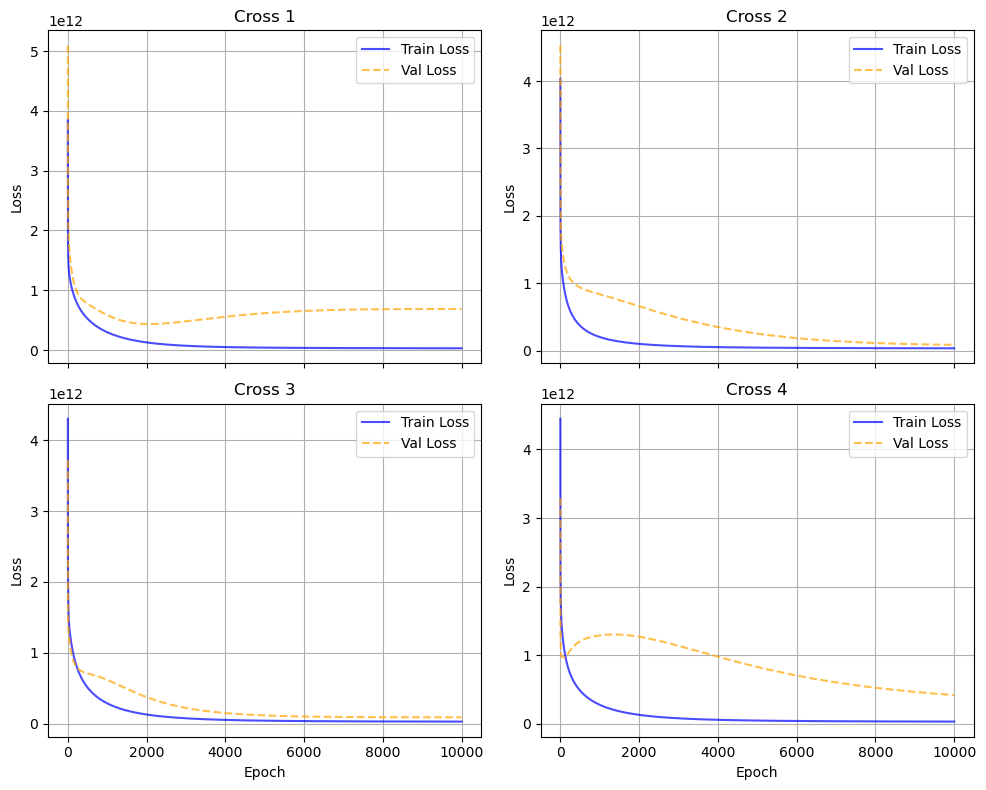

In [57]:
plot_cross_validation(cross_validation_losses)

In [58]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

#### Label Normalization
So far, we have been using normalized features to predict the original labels. In this section, we will explore scaling the labels to a smaller range to facilitate more efficient training.

##### Custom

In [59]:
epochs = 100
learning_rate = 0.2
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [60]:
multiLR = MultiLinearRegression(X_train_bias, y_train_custom, X_val_bias, y_val_custom)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['custom'] = multiLR

Epoch: 0 | Train Loss: 0.0416 | Val Loss: 0.0482
Epoch: 10 | Train Loss: 0.0169 | Val Loss: 0.0199
Epoch: 20 | Train Loss: 0.0148 | Val Loss: 0.0171
Epoch: 30 | Train Loss: 0.0138 | Val Loss: 0.0158
Epoch: 40 | Train Loss: 0.0131 | Val Loss: 0.0149
Epoch: 50 | Train Loss: 0.0126 | Val Loss: 0.0143
Epoch: 60 | Train Loss: 0.0121 | Val Loss: 0.0137
Epoch: 70 | Train Loss: 0.0117 | Val Loss: 0.0132
Epoch: 80 | Train Loss: 0.0113 | Val Loss: 0.0128
Epoch: 90 | Train Loss: 0.0110 | Val Loss: 0.0123


In [61]:
# Cross validation
k = 4
kind = 'custom'
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

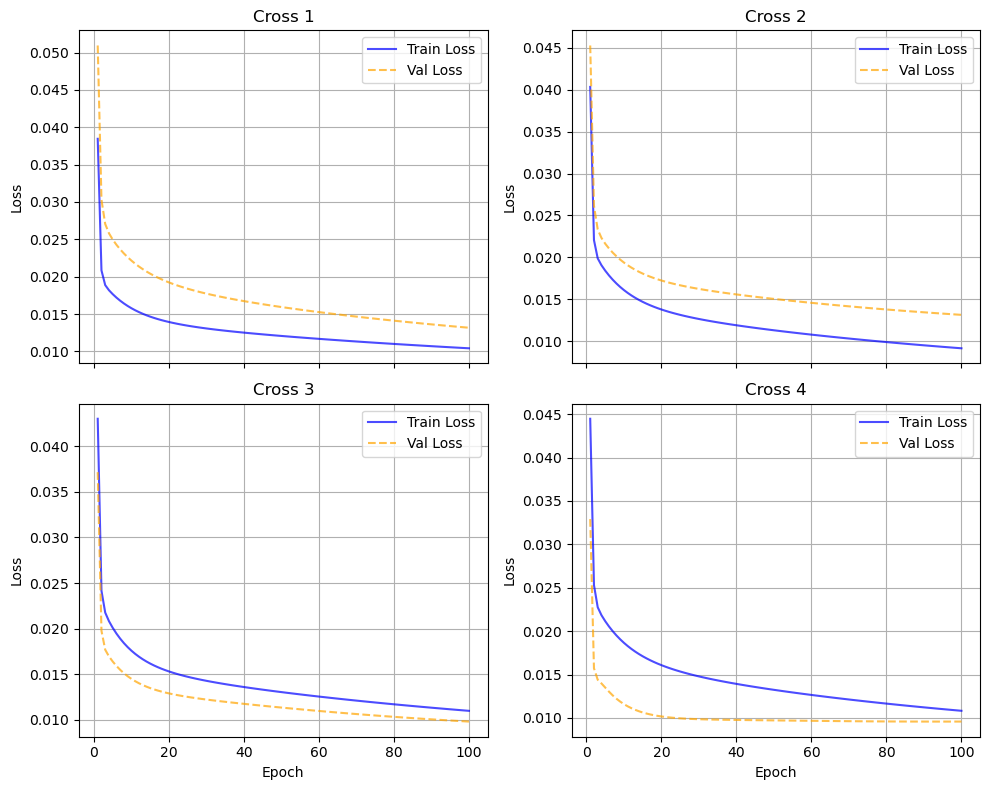

In [62]:
plot_cross_validation(cross_validation_losses)

As expected, the training speed up incredibly fast, with the model converging in just approximately 50 epochs. Although it seems the loss can decrease a bit more, model has nearly reached the minimum so the loss will be updated slowly.

In [63]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_custom, y_pred).loc[:, 'Value'])

After training, predictions have to be denormalized and evaluated again on original labels.

In [64]:
# Retransform to initial range
y_pred = multiLR.predict(X_val_bias)
y_pred_original = y_pred * 1e7
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

##### Log Transformation

In [65]:
epochs = 100
learning_rate = 0.1
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [66]:
multiLR = MultiLinearRegression(X_train_bias, y_train_log, X_val_bias, y_val_log)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['log'] = multiLR

Epoch: 0 | Train Loss: 95.7379 | Val Loss: 96.3402
Epoch: 10 | Train Loss: 0.8715 | Val Loss: 0.7746
Epoch: 20 | Train Loss: 0.6067 | Val Loss: 0.5254
Epoch: 30 | Train Loss: 0.4630 | Val Loss: 0.3911
Epoch: 40 | Train Loss: 0.3818 | Val Loss: 0.3133
Epoch: 50 | Train Loss: 0.3334 | Val Loss: 0.2655
Epoch: 60 | Train Loss: 0.3026 | Val Loss: 0.2342
Epoch: 70 | Train Loss: 0.2814 | Val Loss: 0.2123
Epoch: 80 | Train Loss: 0.2657 | Val Loss: 0.1958
Epoch: 90 | Train Loss: 0.2533 | Val Loss: 0.1829


In [67]:
# Cross validation
k = 4
kind = 'log'
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

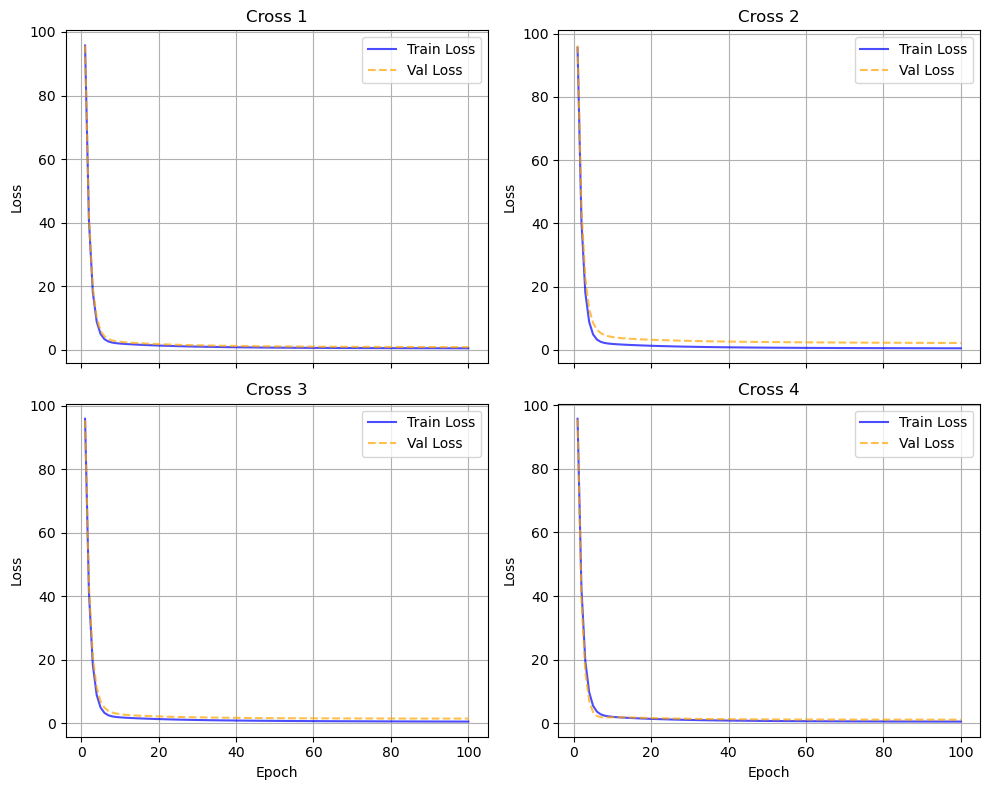

In [68]:
plot_cross_validation(cross_validation_losses)

In [69]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_log, y_pred).loc[:, 'Value'])

In [70]:
# Retransform to initial range
y_pred = multiLR.predict(X_val_bias)
y_pred_original = np.exp(y_pred)
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

##### Min-Max Scaler

In [71]:
epochs = 100
learning_rate = 0.1
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [72]:
multiLR = MultiLinearRegression(X_train_bias, y_train_scaled, X_val_bias, y_val_scaled)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['min_max'] = multiLR

Epoch: 0 | Train Loss: 0.0054 | Val Loss: 0.0116
Epoch: 10 | Train Loss: 0.0026 | Val Loss: 0.0065
Epoch: 20 | Train Loss: 0.0023 | Val Loss: 0.0059
Epoch: 30 | Train Loss: 0.0021 | Val Loss: 0.0056
Epoch: 40 | Train Loss: 0.0020 | Val Loss: 0.0053
Epoch: 50 | Train Loss: 0.0019 | Val Loss: 0.0051
Epoch: 60 | Train Loss: 0.0018 | Val Loss: 0.0050
Epoch: 70 | Train Loss: 0.0018 | Val Loss: 0.0048
Epoch: 80 | Train Loss: 0.0017 | Val Loss: 0.0047
Epoch: 90 | Train Loss: 0.0017 | Val Loss: 0.0046


In [73]:
# Cross validation
k = 4
kind = 'min_max'
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

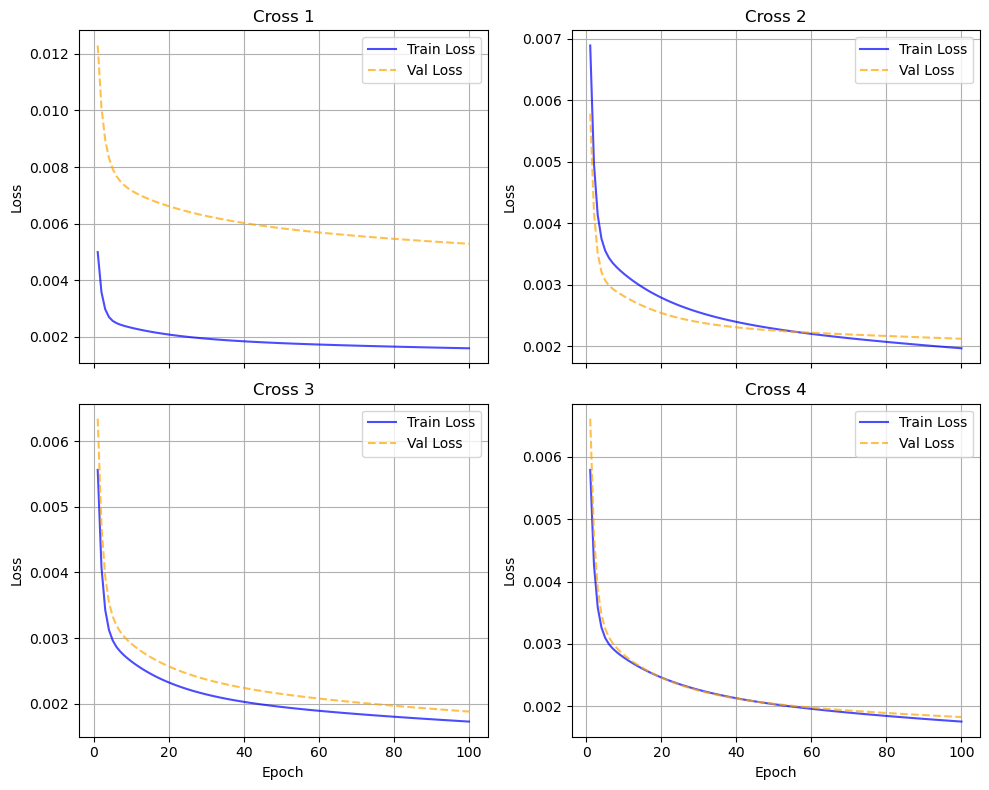

In [74]:
plot_cross_validation(cross_validation_losses)

In [75]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_scaled, y_pred).loc[:, 'Value'])

In [76]:
# Retransform to initial range
y_pred_original = y_pred * (train_max - train_min) + train_min
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

##### Standardization

In [77]:
epochs = 5000
learning_rate = 0.2
log_interval = epochs / 10
thetas, train_losses, val_losses = [], [], []

In [78]:
multiLR = MultiLinearRegression(X_train_bias, y_train_standardized, X_val_bias, y_val_standardized)
thetas, train_losses, val_losses = multiLR.train(epochs, learning_rate, log_interval)
models['standardization'] = multiLR

Epoch: 0 | Train Loss: 0.5000 | Val Loss: 0.5000
Epoch: 500 | Train Loss: 0.0917 | Val Loss: 0.0711
Epoch: 1000 | Train Loss: 0.0520 | Val Loss: 0.0364
Epoch: 1500 | Train Loss: 0.0339 | Val Loss: 0.0249
Epoch: 2000 | Train Loss: 0.0241 | Val Loss: 0.0212
Epoch: 2500 | Train Loss: 0.0182 | Val Loss: 0.0205
Epoch: 3000 | Train Loss: 0.0146 | Val Loss: 0.0211
Epoch: 3500 | Train Loss: 0.0123 | Val Loss: 0.0222
Epoch: 4000 | Train Loss: 0.0107 | Val Loss: 0.0234
Epoch: 4500 | Train Loss: 0.0096 | Val Loss: 0.0246


In [79]:
# Cross validation
k = 4
kind = 'standardization'
cross_validation_losses = {}
cross_validation_losses = train_data_after_preprocessing.k_fold_cross_validation(MultiLinearRegression, k, epochs, learning_rate, log_interval, kind)

Data encoding completed!
Data encoding completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 30), ('Model', 444), ('Price', 469), ('Year', 21), ('Kilometer', 520), ('Fuel Type', 2), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 6), ('Seller Type', 2), ('Engine', 93), ('Max Power', 141), ('Max Torque', 120), ('Drivetrain', 3), ('Length', 209), ('Width', 149), ('Height', 172), ('Seating Capacity', 6), ('Fuel Tank Capacity', 47), ('rpm at Max Power', 35), ('rpm at Max Torque', 43)]
Data normalization completed!
Object Columns and number of unique values: 0
[]

Numeric Columns and number of unique values: 22
[('Make', 27), ('Model', 213), ('Price', 225), ('Year', 16), ('Kilometer', 232), ('Fuel Type', 1), ('Transmission', 2), ('Location', 2), ('Color', 2), ('Owner', 4), ('Seller Type', 2), ('Engine', 69), ('Max Power', 98), ('Max Torque', 84), ('Drivetrain', 3), ('Length', 129), ('Width', 102), ('Height', 112)

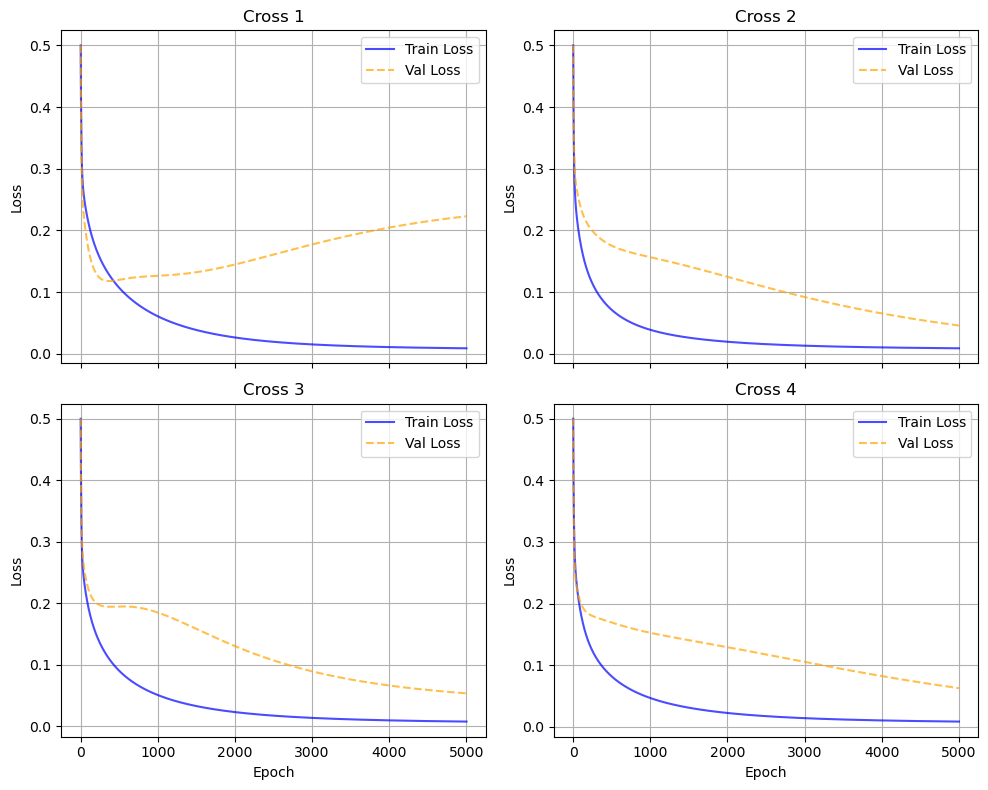

In [80]:
plot_cross_validation(cross_validation_losses)

In [81]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_standardized, y_pred).loc[:, 'Value'])

In [82]:
# Retransform to initial range
y_pred_original = y_pred * val_std + val_mean
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

### VII.5 Summary

In [83]:
# Evaluation summary
summary = pd.concat(evaluations, axis=1)
summary.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary.columns = ['Base', 'Bias', 'Custom', 'Log transformation', 'Min-Max scaler', 'Standardization']
summary

,Base,Bias,Custom,Log transformation,Min-Max scaler,Standardization
Mean Squared Error,2.473952e+11,2.478718e+11,2.386794e+12,1.992308e+12,2.860059e+12,3.331065e+11
Root Mean Squared Error,4.973884e+05,4.978673e+05,1.544925e+06,1.411492e+06,1.691171e+06,5.771538e+05
Mean Absolute Error,2.741604e+05,2.742733e+05,6.668759e+05,7.857290e+05,7.200792e+05,3.369507e+05
R^2 Score,9.618151e-01,9.617416e-01,6.316041e-01,6.924920e-01,5.585568e-01,9.485858e-01


In [84]:
# Evaluation summary on normalized labels
summary_label_normalized = pd.concat(evaluations_label_normalized, axis=1)
summary_label_normalized.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary_label_normalized.columns = ['Custom', 'Log transformation', 'Min-Max scaler', 'Standardization']
summary_label_normalized

,Custom,Log transformation,Min-Max scaler,Standardization
Mean Squared Error,0.023868,0.344467,0.009146,0.051414
Root Mean Squared Error,0.154493,0.586913,0.095636,0.226747
Mean Absolute Error,0.066688,0.455530,0.036563,0.132378
R^2 Score,0.631604,0.647697,0.443476,0.948586


After experimenting with various approaches, the model with bias achieved the highest R² score. The elevated loss values can be attributed to the significant disparity in the range between the features and labels.

In [85]:
train_data_after_preprocessing.data['Price'].describe()

count    1.482000e+03
mean     1.687759e+06
std      2.338998e+06
min      4.900000e+04
25%      4.812498e+05
50%      8.250000e+05
75%      1.900000e+06
max      2.750000e+07
Name: Price, dtype: float64

However, the high R² score indicates that the model can account for 96.7% of the variance in the data, demonstrating that the base model, the model with bias, and the standardization method are all performing effectively. Ultimately, the model with bias was chosen as the final result.

In [86]:
model = models['bias']
y_pred = model.predict(X_val_bias)
evaluate_model(y_val, y_pred)

,Metric,Value
0,Mean Squared Error,2.478718e+11
1,Root Mean Squared Error,4.978673e+05
2,Mean Absolute Error,2.742733e+05
3,R^2 Score,9.617416e-01


## Part VIII: Polynomial Regression model

### VI.1: Model building

In [87]:
from itertools import combinations_with_replacement

In [88]:
class PolynomialFeatures:
    """
    Tạo ma trận đặc trưng đa thức.
    
    Parameters:
    -----------
    degree : int, mặc định=2
        Bậc của đa thức. 
    
    include_bias : bool, mặc định=True
        Nếu True, thêm cột toàn 1 vào ma trận (hằng số).
    
    interaction_only : bool, mặc định=False
        Nếu True, chỉ bao gồm các tương tác giữa các đặc trưng.
    """
    
    def __init__(self, degree=2, include_bias=True, interaction_only=False):
        self.degree = degree
        self.include_bias = include_bias
        self.interaction_only = interaction_only
    
    def fit(self, X, y=None):
        """
        Tính số lượng đặc trưng đầu ra.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng đầu vào.
        
        Returns
        -------
        self : object
        """
        n_samples, n_features = np.asarray(X).shape
        self.n_input_features_ = n_features
        
        # Tính số lượng đặc trưng đầu ra
        combinations = []
        for d in range(0, self.degree + 1):
            if d == 0 and not self.include_bias:
                continue
            if d == 1:  # không thay đổi các đặc trưng ban đầu
                combinations.extend(range(n_features))
                continue
                
            if self.interaction_only:
                combinations.extend(combinations_with_replacement(range(n_features), d))
            else:
                combinations.extend([c for c in combinations_with_replacement(range(n_features), d) 
                                    if len(set(c)) == 1])
        
        self.n_output_features_ = len(combinations) + (1 if self.include_bias else 0)
        return self
    
    def transform(self, X):
        """
        Chuyển đổi đặc trưng thành đặc trưng đa thức.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng đầu vào.
        
        Returns
        -------
        XP : np.ndarray, shape (n_samples, n_output_features)
            Ma trận đặc trưng đa thức.
        """
        X = np.asarray(X)
        n_samples, n_features = X.shape
        
        if n_features != self.n_input_features_:
            raise ValueError("X shape does not match training shape")
        
        # Khởi tạo ma trận đầu ra
        XP = np.ones((n_samples, 0))
        
        # Thêm hằng số nếu include_bias=True
        if self.include_bias:
            XP = np.hstack((np.ones((n_samples, 1)), XP))
        
        # Thêm đặc trưng ban đầu (bậc 1)
        if self.degree >= 1:
            XP = np.hstack((XP, X))
        
        # Tạo đặc trưng đa thức bậc cao hơn
        for d in range(2, self.degree + 1):
            if self.interaction_only:
                combs = [c for c in combinations_with_replacement(range(n_features), d)
                         if len(set(c)) > 1]
            else:
                combs = list(combinations_with_replacement(range(n_features), d))
            
            for comb in combs:
                new_col = np.ones((n_samples, 1))
                for i in comb:
                    new_col = new_col * X[:, i:i+1]
                XP = np.hstack((XP, new_col))
        
        return XP
    
    def fit_transform(self, X, y=None):
        """
        Fit và transform cùng một lúc.
        """
        return self.fit(X).transform(X)

In [89]:
class LinearRegression:
    """
    Hồi quy tuyến tính bằng OLS (Ordinary Least Squares).
    
    Parameters
    ----------
    fit_intercept : bool, mặc định=True
        Có tính hằng số hay không.
    """
    
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        """
        Huấn luyện mô hình hồi quy tuyến tính.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.
        
        y : array-like, shape (n_samples,)
            Vector mục tiêu.
        
        Returns
        -------
        self : object
        """
        X = np.asarray(X)
        y = np.asarray(y)
        
        # Add a column of ones for the intercept if fit_intercept=True
        if self.fit_intercept:
            X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
        else:
            X_with_intercept = X

        # Calculate coefficients using the normal equation: beta = (X^T X)^(-1) X^T y
        beta, residues, rank, s = np.linalg.lstsq(X_with_intercept, y, rcond=None)

        if self.fit_intercept:
            self.intercept_ = beta[0]
            self.coef_ = beta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = beta
            
        return self
    
    def predict(self, X):
        """
        Dự đoán sử dụng mô hình đã huấn luyện.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.
        
        Returns
        -------
        y_pred : array, shape (n_samples,)
            Giá trị dự đoán.
        """
        X = np.asarray(X)
        return X.dot(self.coef_) + self.intercept_

In [90]:
class PolynomialRegression:
    """
    Mô hình hồi quy đa thức.
    
    Parameters
    ----------
    degree : int, mặc định=2
        Bậc của đa thức.
    
    include_bias : bool, mặc định=True
        Có thêm cột toàn 1 vào ma trận không.
    
    interaction_only : bool, mặc định=False
        Chỉ bao gồm các tương tác giữa các đặc trưng.
    """
    
    def __init__(self, degree=2, include_bias=True, interaction_only=False):
        self.degree = degree
        self.include_bias = include_bias
        self.interaction_only = interaction_only
        self.poly = PolynomialFeatures(degree=degree, 
                                       include_bias=include_bias,
                                       interaction_only=interaction_only)
        self.linear_regression = LinearRegression(fit_intercept=False if include_bias else True)
    
    def fit(self, X, y):
        """
        Huấn luyện mô hình hồi quy đa thức.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.
        
        y : array-like, shape (n_samples,)
            Vector mục tiêu.
        
        Returns
        -------
        self : object
        """
        X_poly = self.poly.fit_transform(X)
        self.linear_regression.fit(X_poly, y)
        return self
    
    def predict(self, X):
        """
        Dự đoán sử dụng mô hình đã huấn luyện.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.
        
        Returns
        -------
        y_pred : array, shape (n_samples,)
            Giá trị dự đoán.
        """
        X_poly = self.poly.transform(X)
        return self.linear_regression.predict(X_poly)

### VI.2: Training and evaluate

In [91]:
X_train_v3 = train_data.drop(columns=['Price'])
y_train_v3 = train_data['Price']

X_val_v3 = validation_data.drop(columns=['Price'])
y_val_v3 = validation_data['Price']

model = PolynomialRegression(degree=1)
model.fit(X_train_v3, y_train_v3)
    
y_pred = model.predict(X_val_v3)
model_eval = evaluate_model(y_val_v3, y_pred)
model_eval

,Metric,Value
0,Mean Squared Error,2.733188e+11
1,Root Mean Squared Error,5.227990e+05
2,Mean Absolute Error,2.806297e+05
3,R^2 Score,9.578139e-01


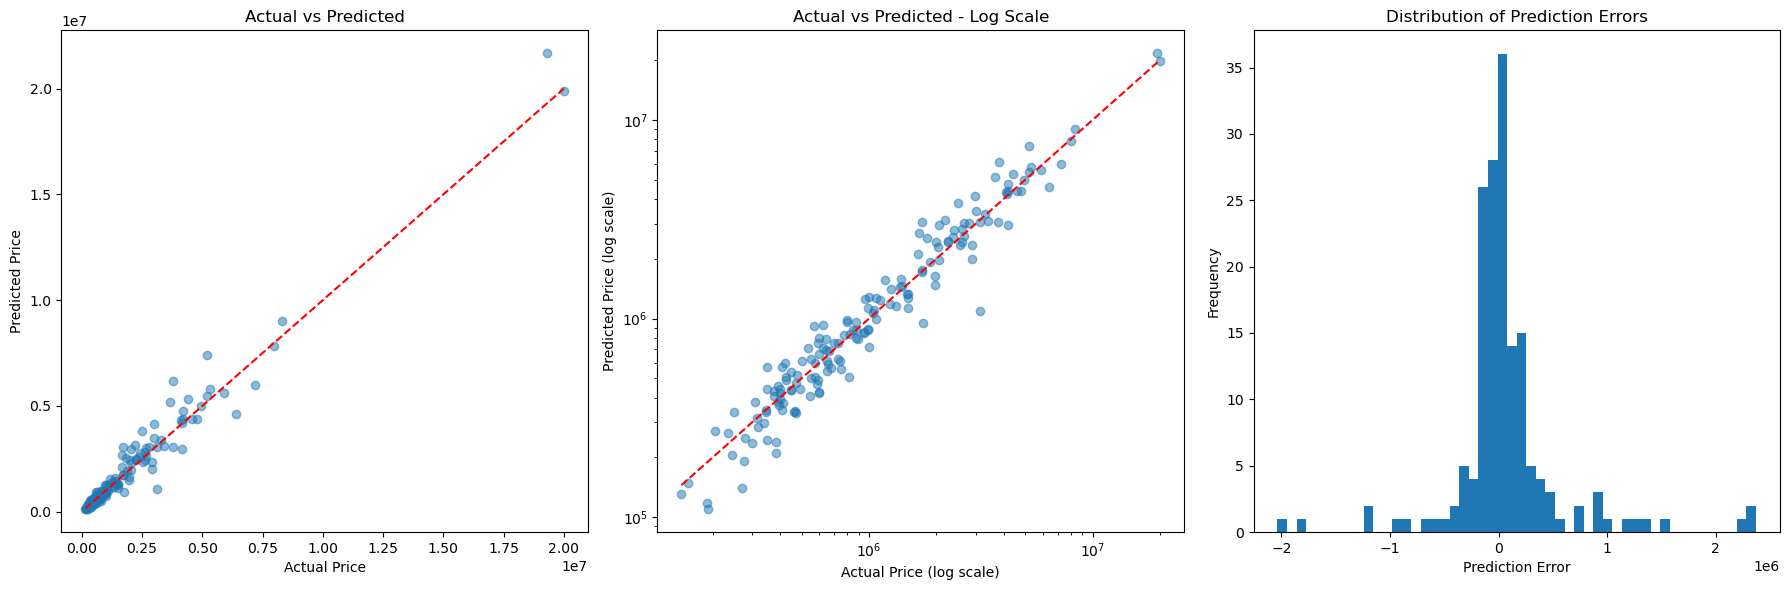

In [92]:
plt.figure(figsize=(18, 6))

# Plot 1: Scatter plot of predicted vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_val_v3, y_pred, alpha=0.5)
plt.plot([y_val_v3.min(), y_val_v3.max()], [y_val_v3.min(), y_val_v3.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

# Plot 2: Same scatter plot with log scale (helps with extreme values)
plt.subplot(1, 3, 2)
plt.scatter(y_val_v3, y_pred, alpha=0.5)
plt.plot([y_val_v3.min(), y_val_v3.max()], [y_val_v3.min(), y_val_v3.max()], 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Actual vs Predicted - Log Scale')

# Plot 3: Histogram of errors
plt.subplot(1, 3, 3)
errors = y_pred - y_val_v3
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

## Part IX: Linear Regression model with PCA

#### IX.1 Data and Heatmap

In [93]:
train_data_PCA= copy.deepcopy(train_data_after_encoding)
validation_data_PCA = copy.deepcopy(validation_data_after_encoding)

In [94]:
#Đưa về dạng data frame
if not isinstance(train_data_PCA, pd.DataFrame):
    if hasattr(train_data_PCA, "to_dataframe"):
        train_data_after_normalization_copy = train_data_PCA.to_dataframe()
    elif hasattr(train_data_PCA ,"data"):
        train_data_after_normalization_copy = pd.DataFrame(train_data_PCA.data)
    else:
        raise TypeError("train_data_after_normalization không phải DataFrame và không có phương thức phù hợp để chuyển đổi.")

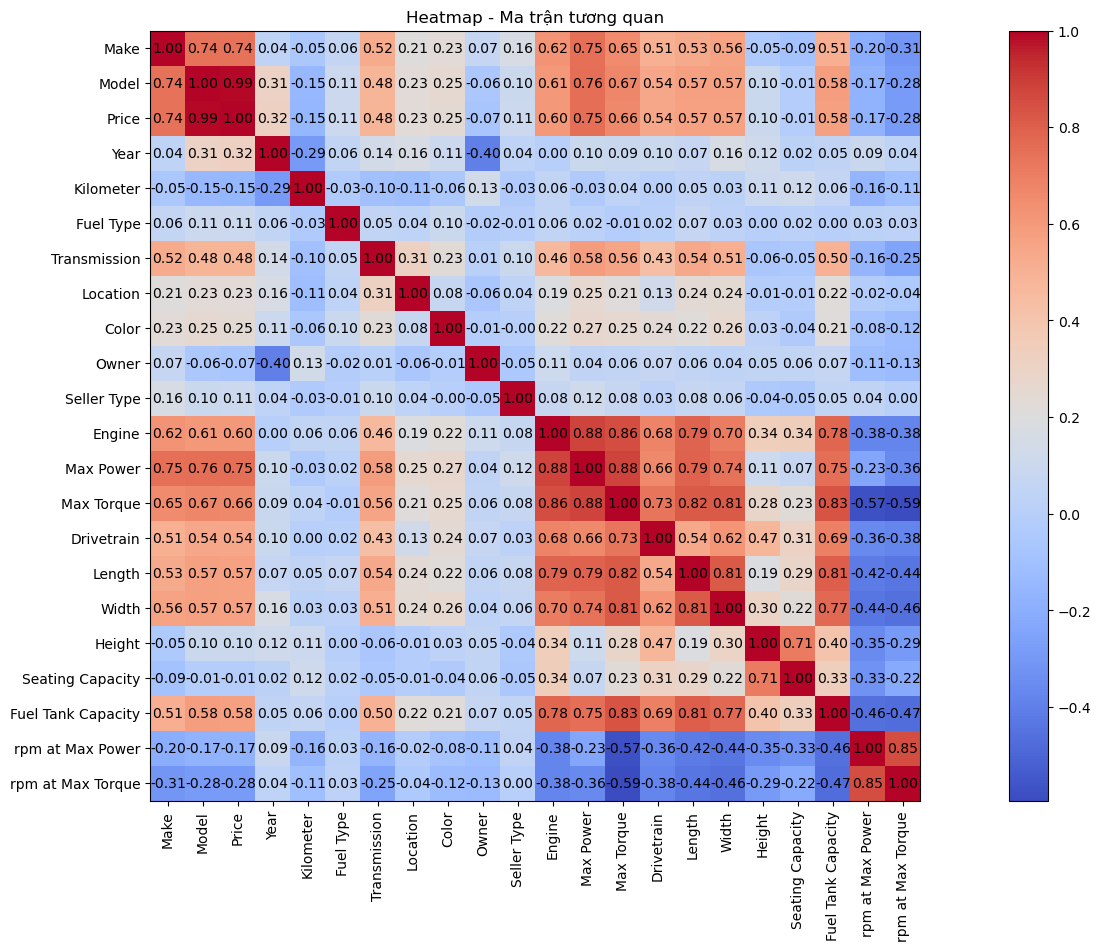

In [95]:
# Tính ma trận tương quan
correlation_matrix = train_data_after_normalization_copy.corr().to_numpy()
labels = train_data_after_normalization_copy.columns

# Vẽ heatmap bằng Matplotlib
plt.figure(figsize=(23, 10))  # Điều chỉnh kích thước
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()  # Thanh màu

# Thêm giá trị số vào mỗi ô
num_vars = len(correlation_matrix)
for i in range(num_vars):
    for j in range(num_vars):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}", ha="center", va="center", color="black")

# Đặt tên trục
plt.xticks(np.arange(num_vars), labels, rotation=90)
plt.yticks(np.arange(num_vars), labels)

plt.title("Heatmap - Ma trận tương quan")
plt.show()

Nhận xét: Từ ma trận heatmap (Ma trận tương quan) ta thấy những bộ tương quan sau có thể giảm số chiều về 1

['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']

['Engine', 'Max Power', 'Max Torque', 'Drivetrain']

['rpm at Max Power', 'rpm at Max Torque']

#### IX.2 PCA 

In [96]:
def pca(X, num_components):
 
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    principal_components = eigenvectors_sorted[:, :num_components]
    X_pca = np.dot(X_meaned, principal_components)
    return X_pca

In [97]:
# Chọn các cột để áp dụng PCA
num_components = 1
#Bước 1: PCA nhung bo du lieu can
##########################################
columns_to_pca = ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']
for col in columns_to_pca:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input = train_data_after_normalization_copy[columns_to_pca].values
X_pca_transformed = pca(X_pca_input, num_components)
##########################################
columns_to_pca1 = ['Engine', 'Max Power', 'Max Torque', 'Drivetrain']
for col in columns_to_pca1:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input1 = train_data_after_normalization_copy[columns_to_pca1].values
X_pca_transformed1 = pca(X_pca_input1, num_components)
##########################################
columns_to_pca2 = ['rpm at Max Power', 'rpm at Max Torque']
for col in columns_to_pca2:
    if col not in train_data_after_normalization_copy.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")
X_pca_input2 = train_data_after_normalization_copy[columns_to_pca2].values
X_pca_transformed2 = pca(X_pca_input2, num_components)
##########################################

train_data_after_normalization1 = train_data_after_normalization_copy.copy()
#Bước 2: Xoa tren du lieu cu
train_data_after_normalization1.drop(columns=columns_to_pca, inplace=True)
train_data_after_normalization1.drop(columns=columns_to_pca1, inplace=True)
train_data_after_normalization1.drop(columns=columns_to_pca2, inplace=True)
pca_columns1 = [f'PCA_hs_{i+1}' for i in range(num_components)]
pca_df1 = pd.DataFrame(X_pca_transformed, columns=pca_columns1)

# Bước 4: PCA trên nhóm 'cs'
pca_columns2 = [f'PCA_cs_{i+1}' for i in range(num_components)]
pca_df2 = pd.DataFrame(X_pca_transformed1, columns=pca_columns2)

# Bước 5: PCA trên nhóm 'kt'
pca_columns3 = [f'PCA_kt_{i+1}' for i in range(num_components)]
pca_df3 = pd.DataFrame(X_pca_transformed2, columns=pca_columns3)

# Bước 6: Gán dữ liệu PCA vào train_data_after_normalization1
train_data_after_normalization1 = pd.concat([train_data_after_normalization1, pca_df1, pca_df2, pca_df3], axis=1)

In [98]:
if not isinstance(validation_data_PCA , pd.DataFrame):
    if hasattr(validation_data_PCA , "to_dataframe"):
        val_data_after_normalization_copy = validation_data_PCA.to_dataframe()
     
    elif hasattr(validation_data_PCA  ,"data"):
        val_data_after_normalization_copy = pd.DataFrame(validation_data_PCA.data)
    else:
        raise TypeError("val_data_after_normalization_copy không phải DataFrame và không có phương thức phù hợp để chuyển đổi.")

In [99]:
num_components = 1
columns_to_pca = ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']
columns_to_pca1 = ['Engine', 'Max Power', 'Max Torque', 'Drivetrain']
columns_to_pca2 = ['rpm at Max Power', 'rpm at Max Torque']

val_data_after_normalization1 = val_data_after_normalization_copy.drop(columns=columns_to_pca + columns_to_pca1 + columns_to_pca2)
val_data_after_normalization1 = pd.concat([train_data_after_normalization1, pca_df1, pca_df2, pca_df3], axis=1)

X_val_pca1 = pca(val_data_after_normalization_copy[columns_to_pca].values, num_components)
X_val_pca2 = pca(val_data_after_normalization_copy[columns_to_pca1].values, num_components)
X_val_pca3 = pca(val_data_after_normalization_copy[columns_to_pca2].values, num_components)

pca_val_df1 = pd.DataFrame(X_val_pca1, columns=pca_columns1)
pca_val_df2 = pd.DataFrame(X_val_pca2, columns=pca_columns2)
pca_val_df3 = pd.DataFrame(X_val_pca3, columns=pca_columns3)

val_data_after_normalization1 = val_data_after_normalization_copy.drop(columns=columns_to_pca + columns_to_pca1 + columns_to_pca2)
val_data_after_normalization1 = pd.concat([val_data_after_normalization1, pca_val_df1, pca_val_df2, pca_val_df3], axis=1)


#### IX.3 Split data 

In [100]:
train_data_v2 = copy.deepcopy(train_data_after_normalization1)
validation_data_v2 = copy.deepcopy(val_data_after_normalization1)

numeric_features = ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
                    'Location', 'Color', 'Owner', 'Seller Type', 'PCA_hs_1', 'PCA_cs_1', 'PCA_kt_1']

for col in numeric_features:
    mean = train_data_v2[col].mean()
    std = train_data_v2[col].std()
    
    if std == 0:
        std = 1

    train_data_v2[col] = (train_data_v2[col] - mean) / std
    validation_data_v2[col] = (validation_data_v2[col] - mean) / std


X_train_v2 = train_data_v2.drop(columns=['Price'])
y_train_v2 = train_data_v2['Price']

X_val_v2 = validation_data_v2.drop(columns=['Price'])
y_val_v2 = validation_data_v2['Price']

print("Shape of validation_data_v2 after scaling:", validation_data_v2.shape)
print("Shape of validation_data_v2 after scaling:", train_data_v2.shape)

Shape of validation_data_v2 after scaling: (165, 14)
Shape of validation_data_v2 after scaling: (1482, 14)


####  IX.4 Model with PCA

##### Model Multiple Linear Regression with PCA


Evaluation metrics on Training Set:
Epoch 10, loss: 1149732239055.1279
Epoch 20, loss: 464784411433.7414
Epoch 30, loss: 272541414956.0907
Epoch 40, loss: 191815971200.2729
Epoch 50, loss: 147531478093.0227
Epoch 60, loss: 119644925701.1353
Epoch 70, loss: 102017601383.4166
Epoch 80, loss: 90312659257.4931
Epoch 90, loss: 82171835977.8377
Epoch 100, loss: 76838971739.5267
Epoch 110, loss: 73193110244.1246
Epoch 120, loss: 70734455153.0471
Epoch 130, loss: 69034079481.4153
Epoch 140, loss: 67881243881.7843
Epoch 150, loss: 67095889444.5378
Epoch 160, loss: 66547895582.6363
Epoch 170, loss: 66164906558.3397
Epoch 180, loss: 65900977930.4787
Epoch 190, loss: 65717432133.3774
Epoch 200, loss: 65594623399.0760
Best model found with loss = 65594623399.0760


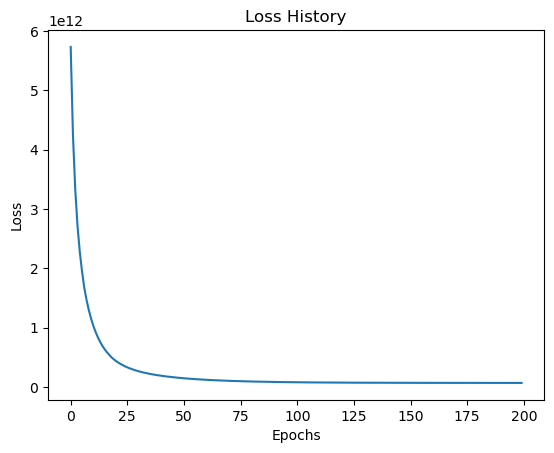

In [101]:
class MultipleLinearRegressionPCA:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def backward(self, X, y_true, y_pred):
        dw = -2 / len(X) * np.dot(X.T, (y_true - y_pred))
        db = -2 / len(X) * np.sum((y_true - y_pred))
        return dw, db

    def fit(self, X_train, y_train):
        if isinstance(X_train, (pd.DataFrame, pd.Series)):
             X_train = X_train.to_numpy()
        if isinstance(y_train, (pd.DataFrame, pd.Series)):
            y_train = y_train.to_numpy()

        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        if y_train.ndim == 1:
            y_train = y_train.reshape(-1, 1)

        best_loss = float('inf')
        best_weights = None
        best_bias = None
        self.loss_history = []

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(n_samples)
            X_train = X_train[idx]
            y_train = y_train[idx]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, y_pred)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Tính loss trên toàn bộ tập train
            y_train_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_train_pred)
            self.loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                best_weights = self.weights.copy()
                best_bias = self.bias

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, loss: {loss:.4f}")

        self.weights = best_weights
        self.bias = best_bias
        print(f"Best model found with loss = {best_loss:.4f}")

        return y_train ,y_train_pred 

    def evaluate(self, X_test, y_test):
        if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()

        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)

        y_test_pred = self.forward(X_test)
        test_loss = self.compute_loss(y_test, y_test_pred)
        print(f"Test Loss: {test_loss:.4f}")

        weights = self.weights.flatten()
        bias = self.bias
        terms = [f"{w:.2f} * x{i+1}" for i, w in enumerate(weights)]
        equation = " + ".join(terms) + f" + {bias:.2f}"

        print("\nPhương trình hồi quy tuyến tính:")
        print(f"y = {equation}")

        # Vẽ đồ thị dự đoán
        self.plot_actual_vs_predicted(y_test, y_test_pred)
        self.plot_residuals(y_test, y_test_pred)

        return test_loss, y_test_pred

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.show()

    def plot_actual_vs_predicted(self, y_true, y_pred):
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        residuals = y_true - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()


# Train and Evaluate Model
print("\nEvaluation metrics on Training Set:")
modelPCA = MultipleLinearRegressionPCA(learning_rate=0.001, n_epochs=200)
y_train , y_train_pred = modelPCA.fit(X_train_v2, y_train_v2)
modelPCA.plot_loss_history()

In [102]:
print("\nEvaluation metrics on Training Set:")
evaluate_model(y_train, y_train_pred)


Evaluation metrics on Training Set:


,Metric,Value
0,Mean Squared Error,6.559462e+10
1,Root Mean Squared Error,2.561145e+05
2,Mean Absolute Error,1.148327e+05
3,R^2 Score,9.880022e-01


Test Loss: 270377520208.2618

Phương trình hồi quy tuyến tính:
y = 53257.25 * x1 + 2256437.37 * x2 + 47867.54 * x3 + -11700.85 * x4 + 743.73 * x5 + -10453.76 * x6 + 3004.83 * x7 + -5688.67 * x8 + -17772.45 * x9 + 11869.83 * x10 + 7241.32 * x11 + -7903.39 * x12 + -7358.04 * x13 + 1687698.59


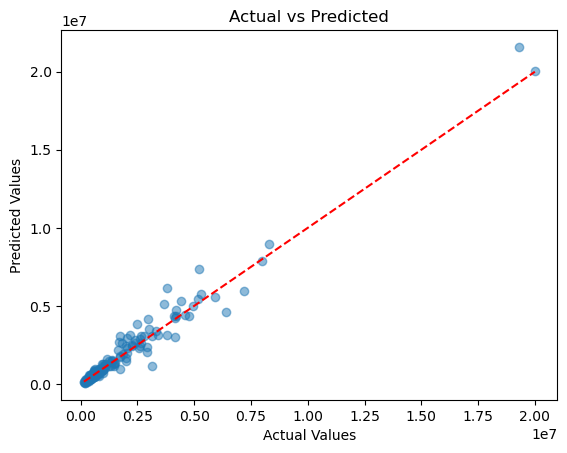

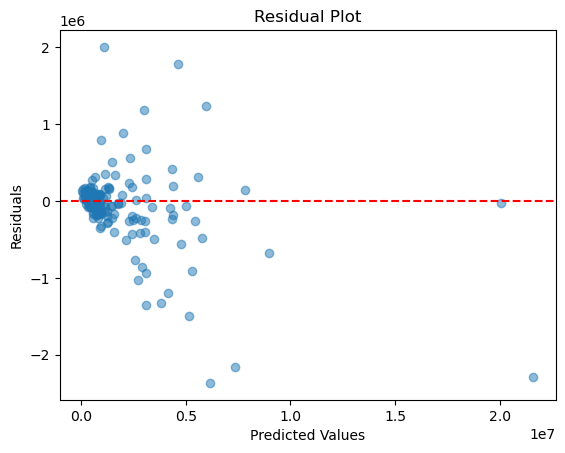

In [103]:
test_loss, y_test_pred = modelPCA.evaluate(X_val_v2, y_val_v2)

In [111]:
print("\nEvaluation metrics on Validation Set:")
evaluate_model(y_val_v2, y_test_pred.reshape(-1))


Evaluation metrics on Validation Set:


,Metric,Value
0,Mean Squared Error,2.703775e+11
1,Root Mean Squared Error,5.199784e+05
2,Mean Absolute Error,2.812529e+05
3,R^2 Score,9.582679e-01


Actual vs Predicted

In [104]:
# Sao chép dữ liệu
y_test_pred_copy = np.copy(y_test_pred)
y_val_v2_copy = np.copy(y_val_v2)

# Chuyển về 1D nếu cần
y_test_pred_copy = y_test_pred_copy.ravel()
y_val_v2_copy = y_val_v2_copy.ravel()

# Tạo DataFrame
df_PCA1 = pd.DataFrame({'Predicted': y_test_pred_copy, 'Actual': y_val_v2_copy})

# Chuyển về kiểu int nếu không gây lỗi
df_PCA1 = df_PCA1.astype(int, errors='ignore')  # Dùng 'ignore' để tránh lỗi nếu có giá trị không chuyển được

In [105]:
df_PCA1.head(10)

,Predicted,Actual
0,501076,425000
1,635543,745000
2,62807,189000
3,7366220,5200000
4,21589886,19300000
5,719171,625000
6,331815,459999
7,1760804,1725000
8,1296485,1475000
9,5431255,5175000
